<a href="https://colab.research.google.com/github/saptaksubhra/Regression-ML-Retail-Sales-Prediction-Rossmann/blob/main/Rossmann_Sales_Prediction_Final_Notebook_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting Sales of a Major Store Chain of Rossmann</u></b>

## <b> Problem Statement</b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# Table of Contents

1.Import Packages

2.Data Preparation

2.1 Load Dataset

2.2 Dealing With Missing Values

2.2.1 Count missing values in each dataset

2.2.2 Remove features with high percentages of missing values

2.2.3 Replace missing values in features with low percentages of missing values

2.3 Joining Tables

2.4 Date Extraction

2.5 Drop Subsets Of Data Which Might Cause Bias

2.6 Feature Engineering

3. Exploratory Data Exploration

3.1 Correlation Heatmap

3.2 Sales Distribution

3.3 Customer Distribution

3.4 Sales Over Time

4. Sales Prediction

4.1 Linear Regression (OLS)

4.2 Bayesian Ridge Regression

4.3 LARS Lasso Regression

4.4 Decision Tree Regression

4.5 Random Forest Regression

4.6 K-Nearest Neighbor Regression

# 1.Importing Required Packages

In [1]:
# Importing important troop of soldiers as libraries and modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':100})
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


In [2]:
# For Preprocessing of dataset
# We need to import preprocessing from sklearn.
from sklearn.preprocessing import StandardScaler

# This import is to build machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

# Modeling Helpers for selection of models
from sklearn.model_selection import train_test_split

# For evaluation of metrics
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score as r2
import math

Important libraries have been imported for the time being. More libraries will be imported as we proceed further and deep dive into the analysis of datasets and as far as the requirement is concerned.

# 2.Data Preparation
# 2.1 Loading Dataset

In [3]:
# Mounting Google Drive to access the dataset of Rossmann Stores

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Loading data from Rossmann csv file and converting into Pandas dataframe

df_sales_Rossmann = pd.read_csv('/content/drive/MyDrive/Almabetter Capstone Projects-Saptaksubhra Bhattacharyya/Regression ML Project-Retail Sales Prediction-Rossmann-Saptaksubhra Bhattacharyya/Rossmann Stores Data.csv')
df_stores_Rossmann = pd.read_csv('/content/drive/MyDrive/Almabetter Capstone Projects-Saptaksubhra Bhattacharyya/Regression ML Project-Retail Sales Prediction-Rossmann-Saptaksubhra Bhattacharyya/store.csv')

# Sales Dataset of Rossmann

In [5]:
# First of all, let's have a look at the ins and out of sales dataset of Rossmann
# Forst five rows of sales dataset of Rossmann
df_sales_Rossmann.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
# Last five rows of the sales dataset of Rossmann
df_sales_Rossmann.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [7]:
# Number of rows and columns in sales dataset of Rossmann

df_sales_Rossmann.shape

(1017209, 9)

In [8]:
# Now the information in detail of sales dataset of Rossmann

df_sales_Rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
# Let's get the statistical information of sales dataset of Rossmann.

df_sales_Rossmann.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [10]:
# Let's check number of unique values of 'DayOfWeek' column in Rossmann sales dataset.
df_sales_Rossmann['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6])

In [11]:
df_sales_Rossmann['DayOfWeek'].value_counts()

5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64

In [12]:
# Number of unique values in 'Open' column in Sales dataset of Rossmann.
df_sales_Rossmann['Open'].unique()

array([1, 0])

In [13]:
# Printing the values of the below mentioned columns.

print('Open : \n', df_sales_Rossmann['Open'].value_counts())
print('\n')
print('Promo : \n', df_sales_Rossmann['Promo'].value_counts())
print('\n')
print('StateHoliday : \n', df_sales_Rossmann['StateHoliday'].value_counts())
print('\n')
print('SchoolHoliday : \n', df_sales_Rossmann['SchoolHoliday'].value_counts())

Open : 
 1    844392
0    172817
Name: Open, dtype: int64


Promo : 
 0    629129
1    388080
Name: Promo, dtype: int64


StateHoliday : 
 0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64


SchoolHoliday : 
 0    835488
1    181721
Name: SchoolHoliday, dtype: int64


It is being oberved that something odd happened in 'StateHoliday' column. Let's become another Sherlock to investigate that mystery.

In [14]:
# Let's check number of unique values in 'StateHoliday' column of Rossmann Sales dataset.

df_sales_Rossmann['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [15]:
# Let's apply lambda anonymous function on 'StateHoliday' column to sort this problem.

df_sales_Rossmann['StateHoliday'] = df_sales_Rossmann['StateHoliday'].apply(lambda x:0 if x == 0 else x)
df_sales_Rossmann['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

Let's check how many stores are open and closed during state holidays. Let's make a groupby of 'StateHoliday' and 'Open' columns to make a new dataframe for the sake of analysis.

In [16]:
# Grouping by 'StateHoliday' and 'Open' columns.

df_sales_Rossmann_new = df_sales_Rossmann.groupby(['StateHoliday', 'Open'])

In [17]:
# Number of stores open and closed during state holidays.

df_sales_Rossmann_new['Open'].value_counts().to_frame()

Open
StateHoliday Open Open        
0            0    0      18932
             1    1     112140
             0    0     123745
             1    1     731342
a            0    0      19566
             1    1        694
b            0    0       6545
             1    1        145
c            0    0       4029
             1    1         71

In [18]:
# Let's sum up the total number of sales of the stores which were opened during state holidays.

df1 = df_sales_Rossmann_new['Open', 'Sales'].sum()
df1

Open       Sales
StateHoliday Open                    
0            0          0           0
             1     112140   751505326
             0          0           0
             1     731342  5113659442
a            0          0           0
             1        694     5890305
b            0          0           0
             1        145     1433744
c            0          0           0
             1         71      691806

In [19]:
df2 = df1[df1['Open'] != 0]
df2

Open       Sales
StateHoliday Open                    
0            1     112140   751505326
             1     731342  5113659442
a            1        694     5890305
b            1        145     1433744
c            1         71      691806

In [20]:
# Let's count the total sales of stores which were opened during state holidays.

sales1 = df2['Sales'].sum()

In [21]:
# Now let's check the total sales in case of the original sales dataset of Rossmann.

sales2 = df_sales_Rossmann['Sales'].sum()

In [22]:
# Now, let's print value of both 'sales1' and 'sales2' to see whether the total sales are same or not in terms of both datasets.

print(sales1)
print('\n')
print(sales2)

5873180623


5873180623


# Observations:

* From the above result, it is obvious that the total sales in both scenarios is same. 
* Also, there are four types of SateHoliday, such as : type a, type b, type c, type d.


Now, let's estimate the percentage of sales for these above mentioned three types of StateHoliday.

In [23]:
# Calculation of percentage of sales of three different types of StateHoliday.
# Now, 'sales1' has been taken as total sales as it's been already estimated.

sales_a = ((5890305) / sales1)*100  # Percentage of sales of type a StateHoliday
sales_b = ((1433744) / sales1)*100  # Percentage of sales of type b StateHoliday
sales_c = ((691806) / sales1)*100   # Percentage of sales type c StateHoliday

sales_a, sales_b, sales_c



(0.10029156905089788, 0.024411713039869845, 0.011779069032728436)

# Observations:

* From those above results, it is visible that sales of type b of state holiday is doulble than that of the sales of type c of state holiday and sales of type a of state holiday is a little more than 4 times of the sales of type b of state holiday. 
* But, if we come to the share of sale in terms of percentage of type a, b, and c then , there is no siginificant difference in comparison with themselves and with sales. Therefore, those different types of stateholidays ( type a, b, c) can be treated as same. So, those three types can be replaced by 1 only.

The 'StateHoliday' column is converted into boolean variable. The value of type a, b , c converted into 1 and others into 0.

In [24]:
# Conversion of 'StateHoliday' column into boolean variable.

df_sales_Rossmann.StateHoliday.replace({'0': 0, 'a': 1, 'b': 1, 'c' : 1}, inplace = True)



In [25]:
print('StateHoliday : \n', df_sales_Rossmann['StateHoliday'].value_counts())

StateHoliday : 
 0    986159
1     31050
Name: StateHoliday, dtype: int64


In [26]:
# Now, let's count number of unique values of 'SchoolHoliday' column.

df_sales_Rossmann['SchoolHoliday'].unique()

array([1, 0])

# Date Extraction:

Now, we need to extract day, month, year, week, quarter, week of year from 'Date' column. Then, let's do it.

In [27]:
# Converting 'Date' column into datetime first.
df_sales_Rossmann['Date'] = pd.to_datetime(df_sales_Rossmann['Date'])

In [28]:
# Extracting day, month, year, week, quarter, week of year from 'Date' column. 

df_sales_Rossmann['Year'] = df_sales_Rossmann['Date'].dt.year
df_sales_Rossmann['Month'] = df_sales_Rossmann['Date'].dt.month
df_sales_Rossmann['Day'] = df_sales_Rossmann['Date'].dt.day
df_sales_Rossmann['Week'] = df_sales_Rossmann['Date'].dt.week%4
df_sales_Rossmann['WeekOfYear'] = df_sales_Rossmann['Date'].dt.week 
df_sales_Rossmann['Quarter'] = df_sales_Rossmann['Date'].dt.quarter

In [29]:
# Now, the new form of sales dataframe

df_sales_Rossmann.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,WeekOfYear,Quarter
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,3,31,3
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,3,31,3
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,3,31,3
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,3,31,3
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,3,31,3


# Stores Dataset of Rossmann

In [30]:
# And next is stores dataset of Rossmann
# First five rows of stores dataset of Rossmann
df_stores_Rossmann.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [31]:
# Last five rows of stores dataset of Rossmann
df_stores_Rossmann.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [32]:
# Number of rows and columns of stores dataset of Rossmann

df_stores_Rossmann.shape

(1115, 10)

In [33]:
# Now the information in detail of stores dataset of Rossmann

df_stores_Rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [34]:
# Let's have the statistical information of stores dataset of Rossmann.

df_stores_Rossmann.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


Distance from the nearest competitor is never equal to 0. The  minimum value is 20 and maximum value is 75860. The minimum value is 1900 at the opening time of a competitor's store  and that is an error. For continuous promotions conducted in stores, the mean is 0.5, and only half of them have been promoted.

In [35]:
# Number of unique values in 'CompetitionOpenSinceYear' in stores dataset of Rossmann.

df_stores_Rossmann['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [36]:
# Number of values in 'CompetitionOpenSinceYear' in stores dataset of Rossmann.

df_stores_Rossmann['CompetitionOpenSinceYear'].value_counts()

2013.0    83
2012.0    82
2014.0    70
2005.0    62
2010.0    55
2008.0    54
2009.0    54
2011.0    54
2007.0    48
2006.0    47
2015.0    38
2002.0    27
2004.0    22
2003.0    19
2001.0    16
2000.0    10
1999.0     8
1990.0     5
1995.0     2
1994.0     2
1961.0     1
1900.0     1
1998.0     1
Name: CompetitionOpenSinceYear, dtype: int64

From the above result, it is evident that most of the opening years of competitive stores are in between 1990 and 2014 except 1900 and 1961 which can be considered as outliers.

In [37]:
# Let's replace years 1900 and 1961 with mode value in "CompetitionOpenSinceYear" column.

df_stores_Rossmann.CompetitionOpenSinceYear.replace(1900, int(df_stores_Rossmann.CompetitionOpenSinceYear.mode()[0]), inplace = True)
df_stores_Rossmann.CompetitionOpenSinceYear.replace(1961, int(df_stores_Rossmann.CompetitionOpenSinceYear.mode()[0]), inplace = True)


In [38]:
# The mode value of 1900 and 1961 in 'CompetitionOpenSinceYear' column of stores dataset of Rossmann.

int(df_stores_Rossmann.CompetitionOpenSinceYear.mode()[0])

2013

# 2.2 Dealing With Missing Values

# 2.2.1 Counting of missing values in each 

Handling missing values is also being a part of data cleaning process. To deal with these missing values let's revisualize stores dataset  and slaes dataset of Rossmann. And the ins and outs will be visible.

In [39]:
df_sales_Rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 15 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  int64         
 8   SchoolHoliday  1017209 non-null  int64         
 9   Year           1017209 non-null  int64         
 10  Month          1017209 non-null  int64         
 11  Day            1017209 non-null  int64         
 12  Week           1017209 non-null  int64         
 13  WeekOfYear     1017209 non-null  int64         
 14  Quarter        1017209 non-null  i

From this information, it can be clearly said that there are no missing values available in sales dataset of Rossmann as number of non-null values are equal in each and every column of that particular dataset and total number of entries is exactly the same as in case of each and every column of the sales dataset. Let's see what the stores dataset talks about.

In [40]:
df_stores_Rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In stores dataset, the total number of entries is 1115 and it is not equal for each and every column present in that dataset. So, undoubtedy there are missing values in those columns which have less entries than 1115. Those columns are 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear' and 'PromoInterval'. Let's revisualize number of missing values in both datasets.

In [41]:
# Printing missing values of each dataset ( Sales dataset and stores dataset)

print('Missing values in sales dataset:\n', df_sales_Rossmann.isnull().sum())
print('\n')
print('Missing values in stores dataset:\n',df_stores_Rossmann.isnull().sum())

Missing values in sales dataset:
 Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Year             0
Month            0
Day              0
Week             0
WeekOfYear       0
Quarter          0
dtype: int64


Missing values in stores dataset:
 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


It is evident that missing values are only in stores dataset. This isnull() operation has been performed to reassure the existence of missing values in a dataset. This also helps identify missing values more accurately. Handling missing values is also a very important aspect as far as the efficiency of machine learning models are concerned. If machine learning models do not work well due to the existence of missing value then it could lead to erronous output which will in turn would be fatal to the decision of company in future investments and realistic approaches.

Let's get back to business to handle those missing values first in stores dataset.

In [42]:
# Handling missing values of stores dataset.

df_stores_Rossmann['CompetitionDistance'] = df_stores_Rossmann['CompetitionDistance'].fillna(df_stores_Rossmann['CompetitionDistance'].median())
df_stores_Rossmann['CompetitionOpenSinceMonth'] = df_stores_Rossmann['CompetitionOpenSinceMonth'].fillna(df_stores_Rossmann['CompetitionOpenSinceMonth'].mode()[0])
df_stores_Rossmann['CompetitionOpenSinceYear'] = df_stores_Rossmann['CompetitionOpenSinceYear'].fillna(df_stores_Rossmann['CompetitionOpenSinceYear'].mode()[0])
#df_stores_Rossmann.drop(['Promo2SinceWeek','Promo2SinceYear','PromoInterval'],axis=1,inplace=True)
df_stores_Rossmann.Promo2SinceWeek.fillna(0, inplace = True)
df_stores_Rossmann.Promo2SinceYear.fillna(0, inplace = True)
df_stores_Rossmann.PromoInterval.fillna(0, inplace = True)

'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval' are the column which have also missing values. But, these columns have been dropped off from the original stores dataset as thsese column will have less impact on sales prediction.

Let's check whether I have been able to replace those null values or not.

In [43]:
# Checking the existence of null values in stores dataset.

df_stores_Rossmann.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Let's look at few number of entries of stores dataset of Rossmann.

In [44]:
# Looking at n number of entries of stores dataset of Rossmann ( Here n = 16).

df_stores_Rossmann.sample(16)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
331,332,a,a,1840.0,3.0,2006.0,0,0.0,0.0,0
258,259,b,b,210.0,9.0,2013.0,0,0.0,0.0,0
900,901,a,c,3170.0,4.0,2014.0,0,0.0,0.0,0
444,445,a,a,240.0,9.0,2013.0,0,0.0,0.0,0
202,203,c,c,490.0,11.0,2002.0,0,0.0,0.0,0
73,74,a,a,330.0,9.0,2013.0,0,0.0,0.0,0
112,113,d,c,20930.0,11.0,1999.0,0,0.0,0.0,0
578,579,c,a,20970.0,11.0,2012.0,0,0.0,0.0,0
166,167,a,a,140.0,4.0,2008.0,0,0.0,0.0,0
814,815,a,a,590.0,1.0,2013.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"


Let's check whether any duplicate value exist or noy in both datasets ( sales dataset and stores dataset )


In [45]:
# Checking duplicate values of sales dataset 

dup_sales = df_sales_Rossmann.duplicated()
dup_sales.sum()

0

In [46]:
# Checking duplicate values of stores dataset

dup_stores = df_stores_Rossmann.duplicated()
dup_stores.sum()

0

It is quite clear that there is no existence of duplicate values in both datasets.

# Numerical Features

Let's investigate how many number of numerical values are available for both sales and stores datasets.

In [47]:
# Checking total number of numerical values in sales dataset of Rossmann.

numerical_features_sales = [feature for feature in df_sales_Rossmann.columns if df_sales_Rossmann[feature].dtypes != 0]
print('Total number of numerical values in sales dataset of Rossmann is : ', len(numerical_features_sales))
print('\n')

df_sales_Rossmann[numerical_features_sales].head()

Total number of numerical values in sales dataset of Rossmann is :  15




,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,WeekOfYear,Quarter
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,3,31,3
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,3,31,3
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,3,31,3
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,3,31,3
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,3,31,3


In [48]:
# Checking total number of numerical values in stores dataset of Rossmann

numerical_features_stores = [feature for feature in df_stores_Rossmann.columns if df_stores_Rossmann[feature].dtypes != 0]
print("Total number of numerical values in stores dataset of Rossmann is : ", len(numerical_features_stores))
print('\n')
df_stores_Rossmann[numerical_features_stores].head()

Total number of numerical values in stores dataset of Rossmann is :  10




,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


# Handling Outliers

To handle outliers, we should start up with target variable i,e. 'Sales' column as it is the most important column as far as the sales prediction is concerned. Numerical features like 'Customers', 'CompetitionDistance' and many more will be explored. This sales dataset has some values which look like outliers. So, we need to check if there are outliers in the sales dataset and if outliers exist, thiose will be removed.

In [49]:
# # Checking total number of zeros in 'Sales' column of sales dataset

(df_sales_Rossmann['Sales'] == 0).sum()


172871

As it can be seen that there are huge number of zeros in the 'Sales' column of sales dataset so only non-zero values will be stored in 'Sales' column.

In [50]:
# Storing up non-zero values in 'Sales' column of sales dataset

df_sales_Rossmann = df_sales_Rossmann[df_sales_Rossmann.Sales != 0]

# Distribution of Sales

Let's do the distribution plot of target variable 'Sales' so that the distribution of sales can be visualized.

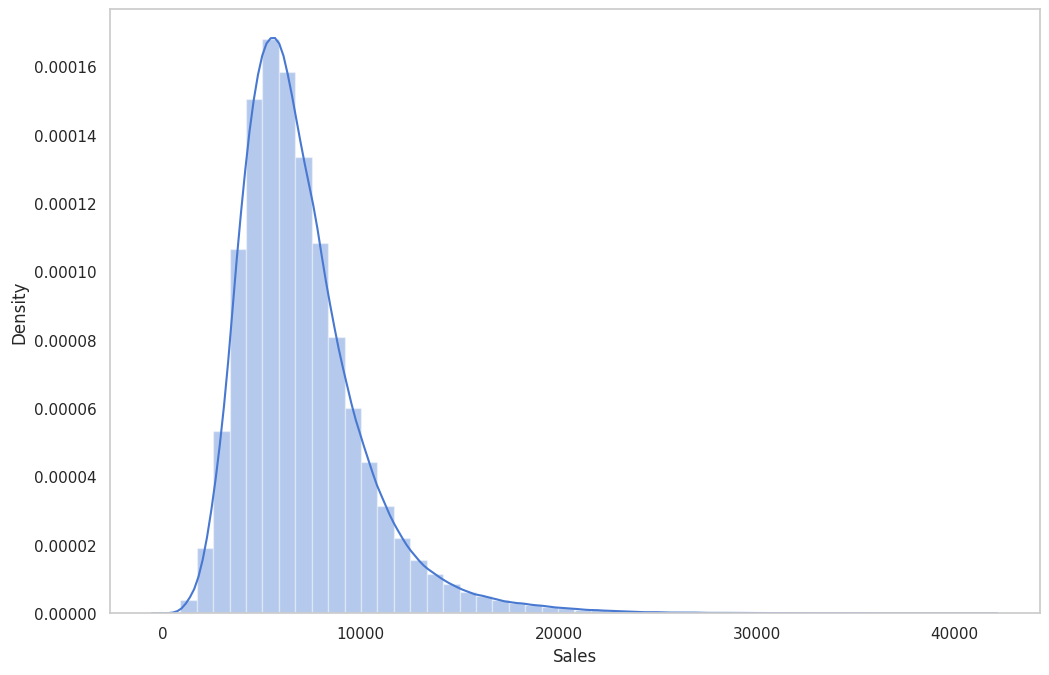

In [51]:
# The distribution of target variable 'Sales'

sns.set_theme(rc = {'figure.figsize' : (12,8)}, style = 'whitegrid', palette = 'muted')
axi = sns.distplot(df_sales_Rossmann['Sales'])
axi.grid(False)

# Observation: 

From the above distribution plot, it can be observed that 'Sales' column is almost normally distributed. To make it a perfect normal distribution, square root of moderate skew has been perfomed.

In [52]:
# Now performing square root of moderate skew to have a perfect normal distribution of sales

df_sales_Rossmann['Sales'] = np.sqrt(df_sales_Rossmann['Sales'])

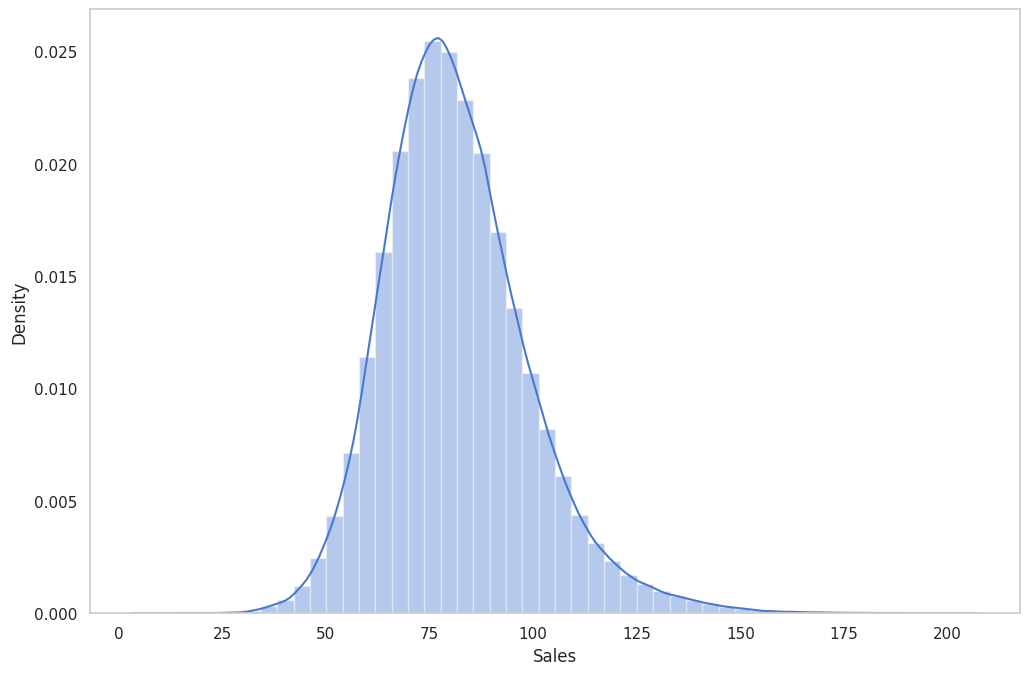

In [53]:
# Let's visualize now through distribution plot.

sns.set_theme(rc = {'figure.figsize' : (12,8)}, style = 'whitegrid', palette = 'muted')
axi = sns.distplot(df_sales_Rossmann['Sales'])
axi.grid(False)

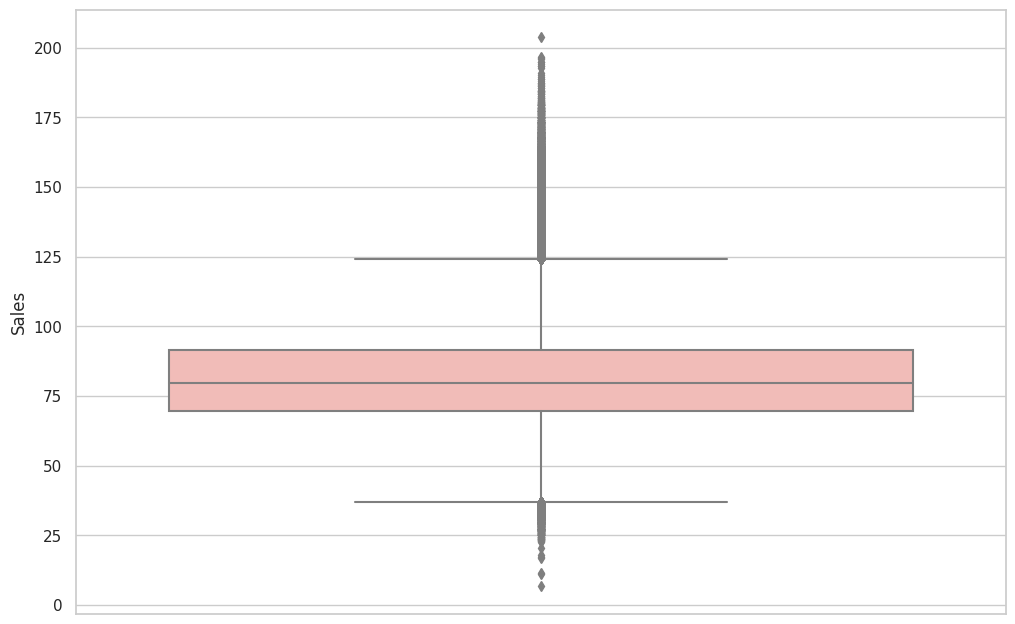

In [54]:
# Now, let's see the boxplot for the same distrinution of sales.

sns.set_style('whitegrid')
sns.boxplot(y = df_sales_Rossmann['Sales'], palette = 'Pastel1')
plt.show()

# Observation:

From the above box plot, it is evident that there are definitely outliers existing in 'Sales' column of sales dataset. Let's remove those first from 'Sales' column.

In [55]:
#Calculation of lower bound, uuper bound, IQR, Q1 and Q3

Q1 = np.percentile(df_sales_Rossmann['Sales'], 25)
Q3 = np.percentile(df_sales_Rossmann['Sales'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [56]:
# Removal of outliers from target variable

df_sales_Rossmann.drop(index = df_sales_Rossmann[df_sales_Rossmann['Sales'] > upper_bound].index, axis = 0, inplace = True)
df_sales_Rossmann.drop(index = df_sales_Rossmann[df_sales_Rossmann['Sales'] < lower_bound].index, axis = 0, inplace = True)

As the outliers have been removed from the target variable so let's do the boxolot now to see the distribution of target variable 'Sales'.

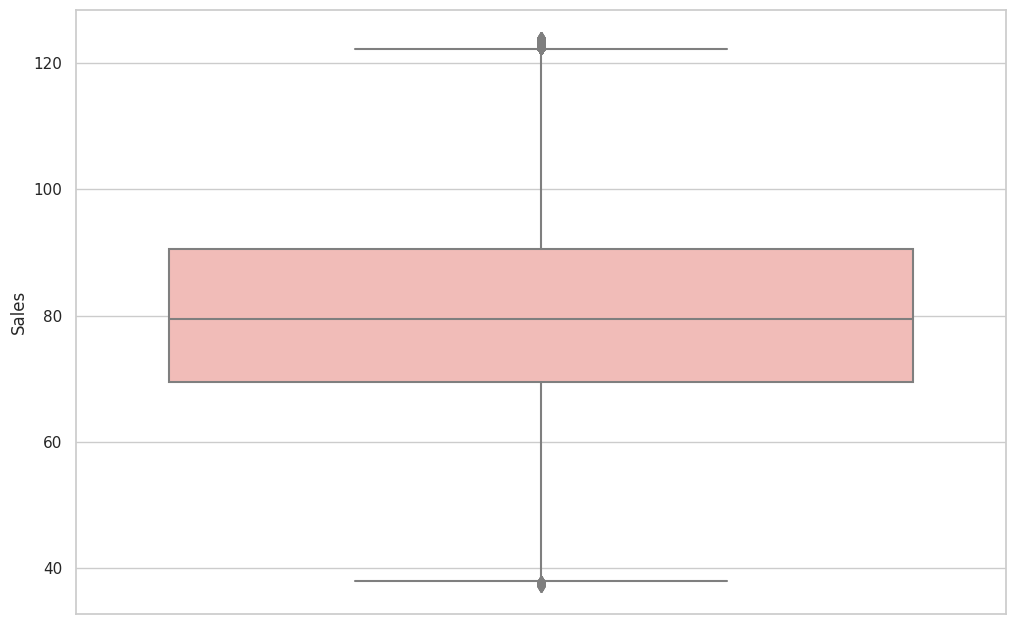

In [57]:
# Plotting the boxplot of target variable.

sns.set_style('whitegrid')
sns.boxplot(y = df_sales_Rossmann['Sales'], palette = 'Pastel1')
plt.show()

# Observation:

From the above boxplot, it is visible that those ouliers have really been the outcast of the boxplot society and that will in turn reflect in terms of better accuracy as far as the distribution of target variable is concerned.

# Distribution of Customers

Let's see what the distribution of customers convey through data visualization. Let's plot distribution plot to see the distribution of customers elaboratively.

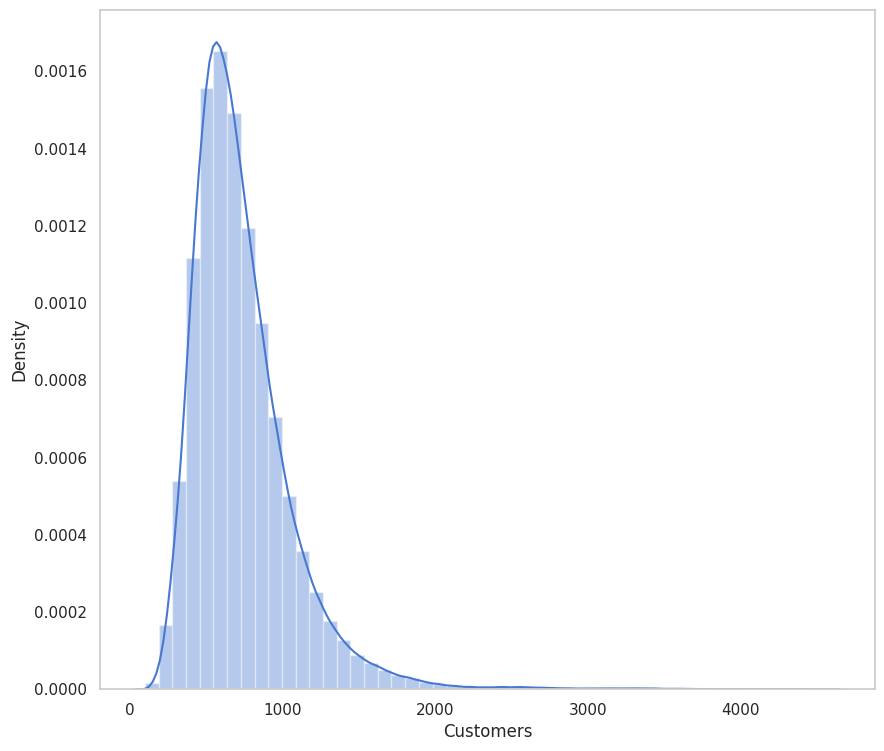

In [58]:
# Distribution of customers

sns.set_theme( rc = {'figure.figsize' : (10,9)}, style = 'whitegrid', palette = 'muted')
axe = sns.distplot(df_sales_Rossmann['Customers'])
axe.grid(False)

# Observation:

From the above distribution plot, it can be observed that 'Customers' column is almost normally distributed. To make it a perfect normal distribution, square root of moderate skew has been perfomed.

In [59]:
# Now performing square root of moderate skew to have a perfect normal distribution of customers

df_sales_Rossmann['Customers'] = np.sqrt(df_sales_Rossmann['Customers'])

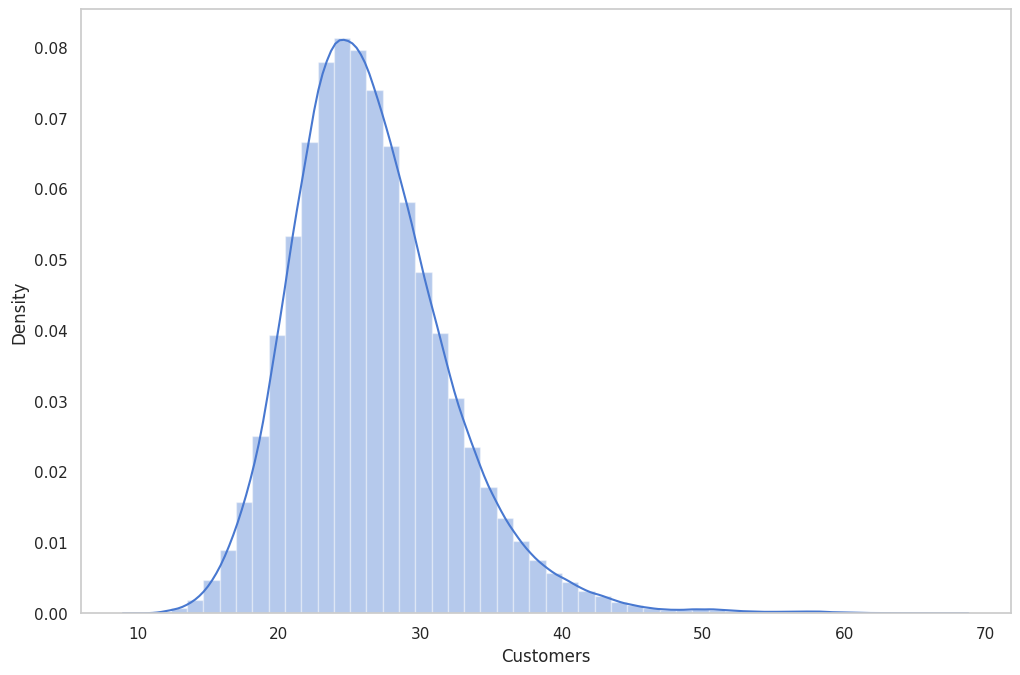

In [60]:
# Let's visualize now through distribution plot.

sns.set_theme(rc = {'figure.figsize' : (12,8)}, style = 'whitegrid', palette = 'muted')
axi = sns.distplot(df_sales_Rossmann['Customers'])
axi.grid(False)

# Observation:

The above distribution plot is almost a perfect example of normal distribution.

# 3. Exploratory Data Exploration ( EDA )

Exploratory data analysis is a crucial part of data analysis. It involves exploring and analyzing the dataset given to find patterns, trends and conclusions to make better decisions related to the data, often using statistical graphics and other data visualization tools to summarize the results. Python libraries like pandas are used to explore the data and matplotlib and seaborn to visualize it. It includes analyzing what our dataset consists of. The impact of categorical as well as numerical features has been explored in relation to the output or depenedent variable named 'Sales'.

Hypotheses

Just by observing the head of the dataset and understanding the features involved in it, the following hypotheses could be framed:

* There's a feature called "DayOfWeek" with the values 1-7 denoting each day of the week. There would be a week off probably Sunday when the stores would be closed and we would get low overall sales.

* Customers would have a positive correlation with Sales.
* The Store type and Assortment strategy involved would be having a certain effect on sales as well. Some premium high quality products would fetch more revenue.
* Promotion should be having a positive correlation with Sales.
* Some stores were closed due to refurbishment, those would generate 0 revenue for that time period.
* Stores are influenced by seasonality, probably before holidays sales would be high.

Let's do some basic EDA. This EDA will be performed both on sales daataset and stores dataset depending upon the requirements and these two datasets have not been merged yet. After merging these two datasets, train-test split will be performed.

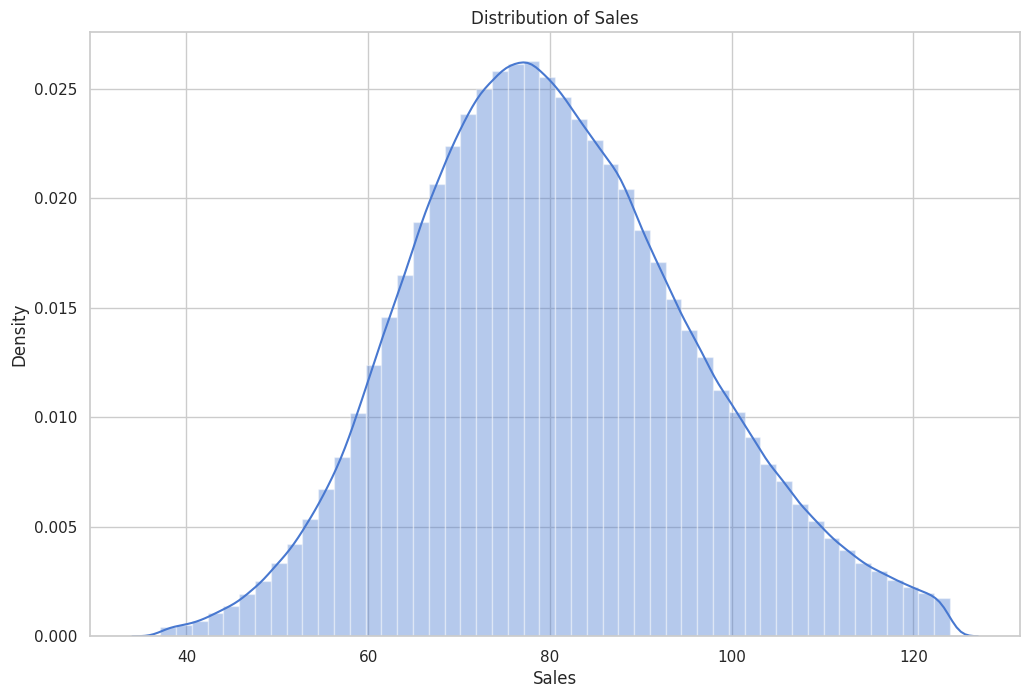

In [61]:
# Distribution of sales 

plt.title('Distribution of Sales')
sns.distplot(df_sales_Rossmann['Sales'])
plt.show()

The distribution plot depicts that the target variable 'Sales' is almost perfectly normally distributed as ouliers have been removed in previous section of handling outliers.

# Sales vs StoreType

This time around, let's observe what is the impact of StoreType and Assortment on Sales. Two bargraphs will be plotted to see those impact separately.

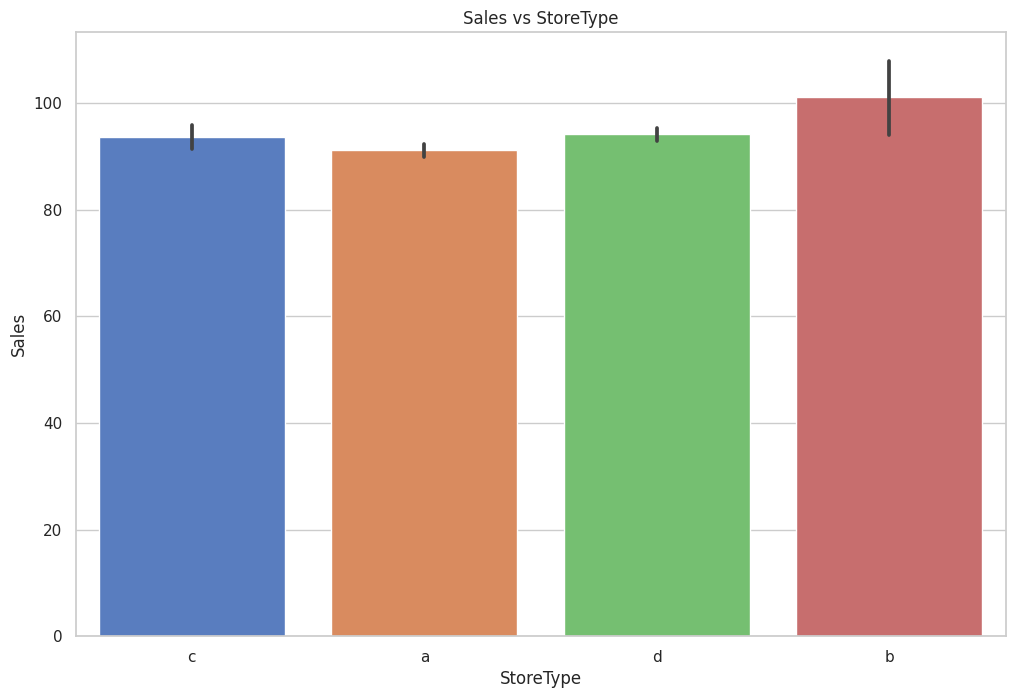

In [62]:
# Now let's see how Sales vs Storetype look like through bar graph.

plt.title('Sales vs StoreType')
sns.barplot(x = df_stores_Rossmann['StoreType'], y = df_sales_Rossmann['Sales'])
plt.show()

# Observations:

* From Sales vs StoreType graph, it is evident that maximum sales belongs to type b store.
* Stores type d and type c share almost the same spot as far as sales is concerned with respect to store type.
* Store type a has minimum sales but not much less than stores type d and type c.

# Sales vs Assortment

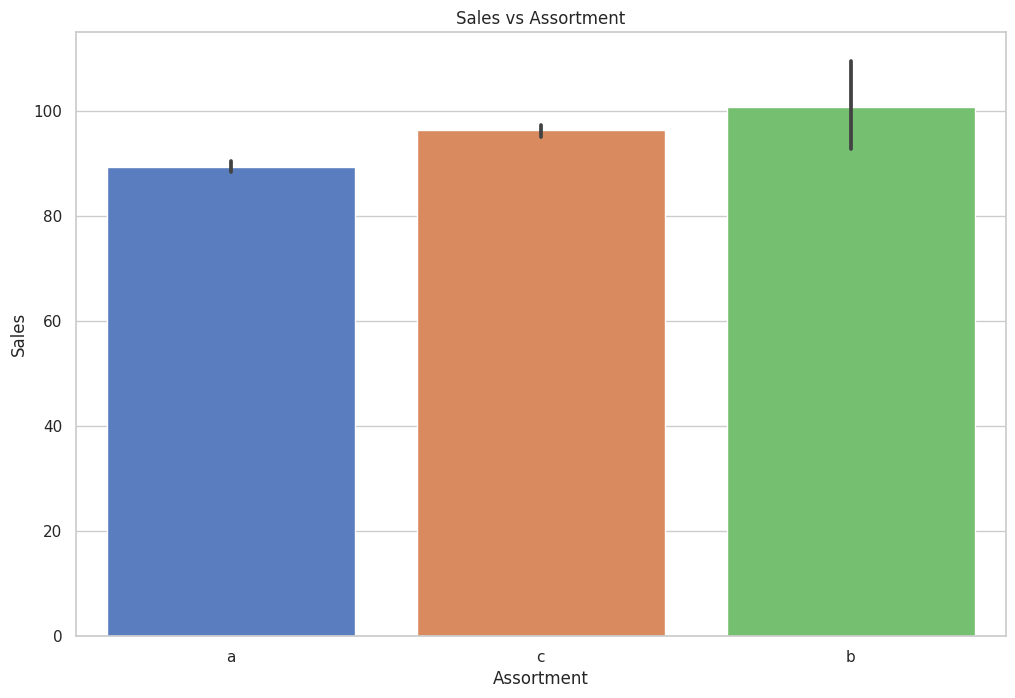

In [63]:
# Bar graph of Sales vs Assortment

sns.barplot(x = df_stores_Rossmann['Assortment'], y = df_sales_Rossmann['Sales'])
plt.title('Sales vs Assortment')
plt.show()

# Observations:

* Bargraph of Sales vs Assortment depicts that type b assortment has the maximum sales followed by type c.
* Type a has the minimum sales.

# Sales vs Promo

Let's observe what is the impact of Promo on Sales and Customers. Two bargraphs will be plotted to see those impact separately.

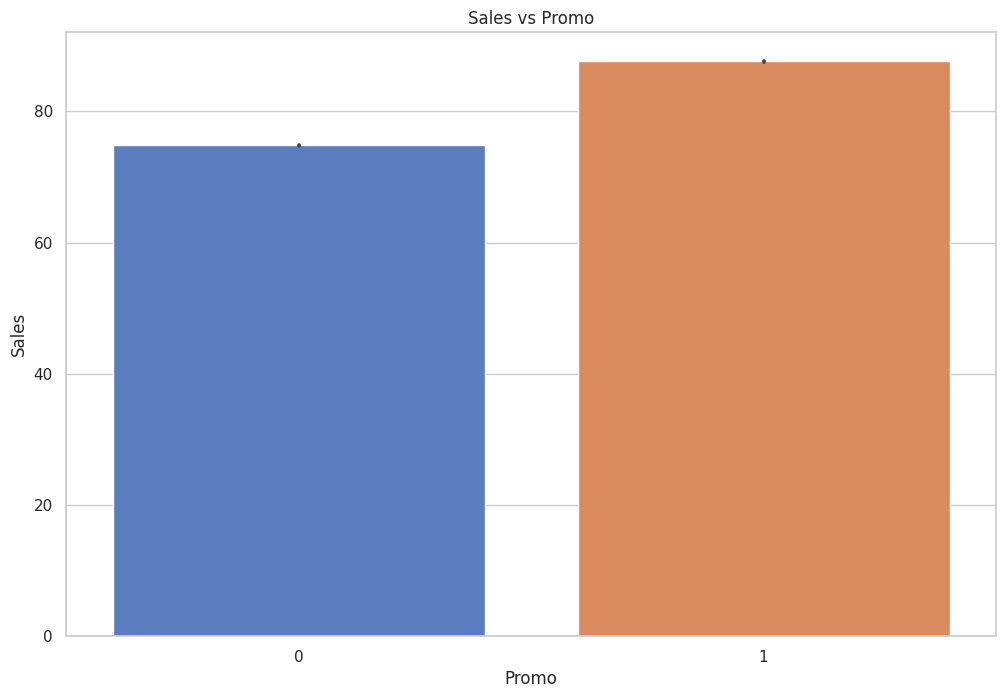

In [64]:
# Bargraph of Sales vs Promo

sns.barplot( x= df_sales_Rossmann['Promo'], y = df_sales_Rossmann['Sales'])
plt.title('Sales vs Promo')
plt.show()

# Customers vs Promo

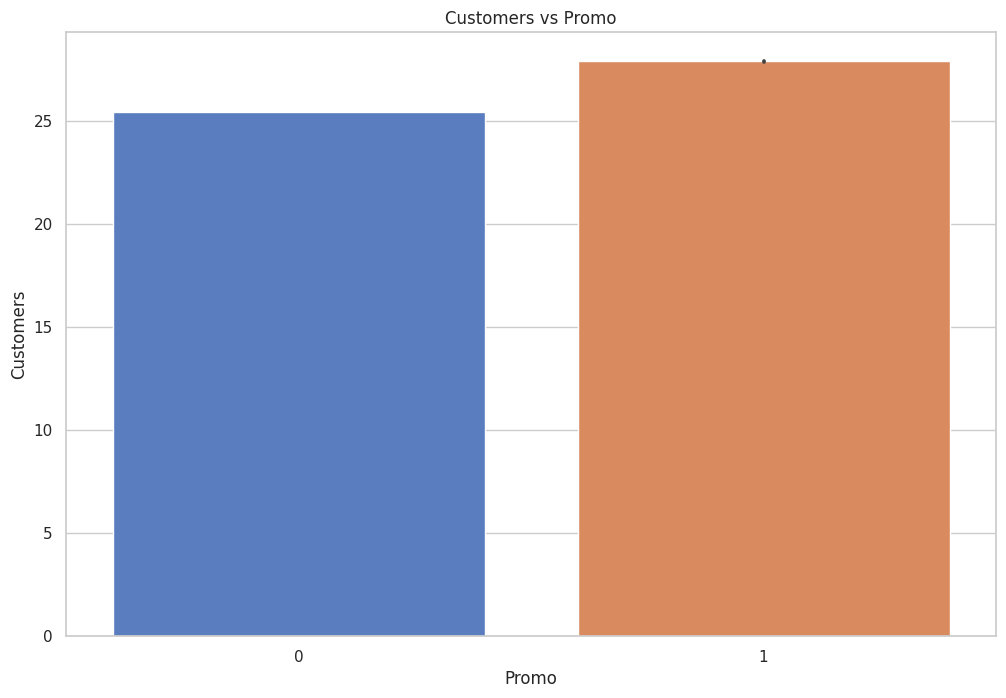

In [65]:
# Bargraph of Customers vs Promo

sns.barplot(x = df_sales_Rossmann['Promo'], y = df_sales_Rossmann['Customers'])
plt.title('Customers vs Promo')
plt.show()

# Observations:

* It can be observed from these two above graphs that the increment of sales and customers do not have a significant role during promotional times. 
* On the contrary, it can be said that Promo does not have that much impact on sales and customers.
* So, whther to implement promo or not on stores, sales amd customers stay the same.

# Sales vs StateHoliday

Now, let's observe what is the effect or impact of StateHolidays on Sales as well as Customers. I'll be plotting two bargraphs to visualize those impact separately.

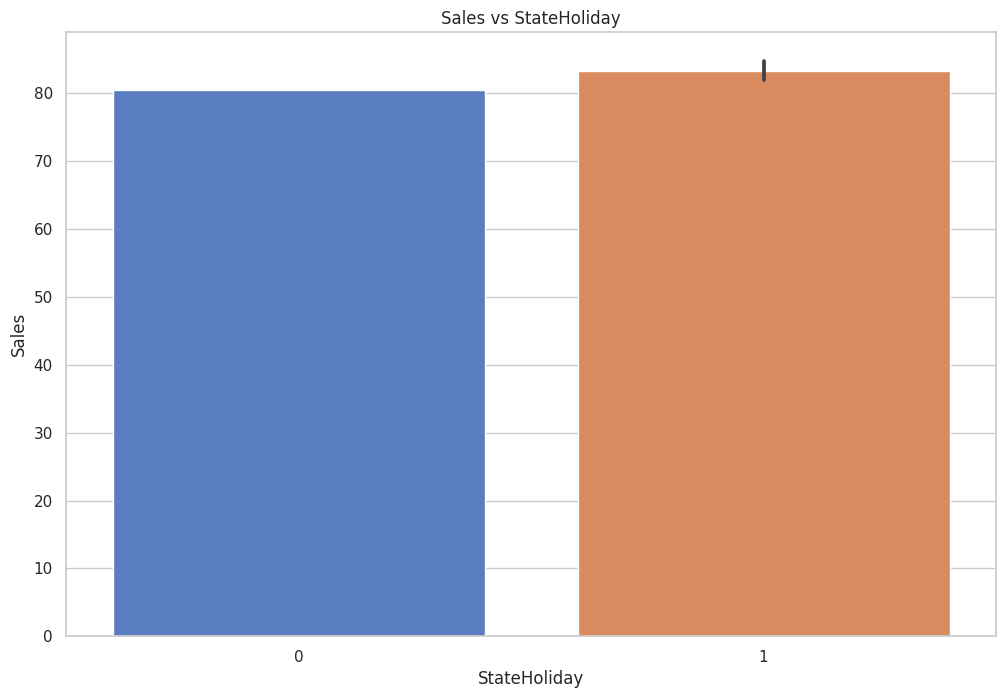

In [66]:
# Bargraph of Sales vs StateHoliday

sns.barplot(x = df_sales_Rossmann['StateHoliday'], y = df_sales_Rossmann['Sales'])
plt.title('Sales vs StateHoliday')
plt.show()

# Customers vs StateHoliday

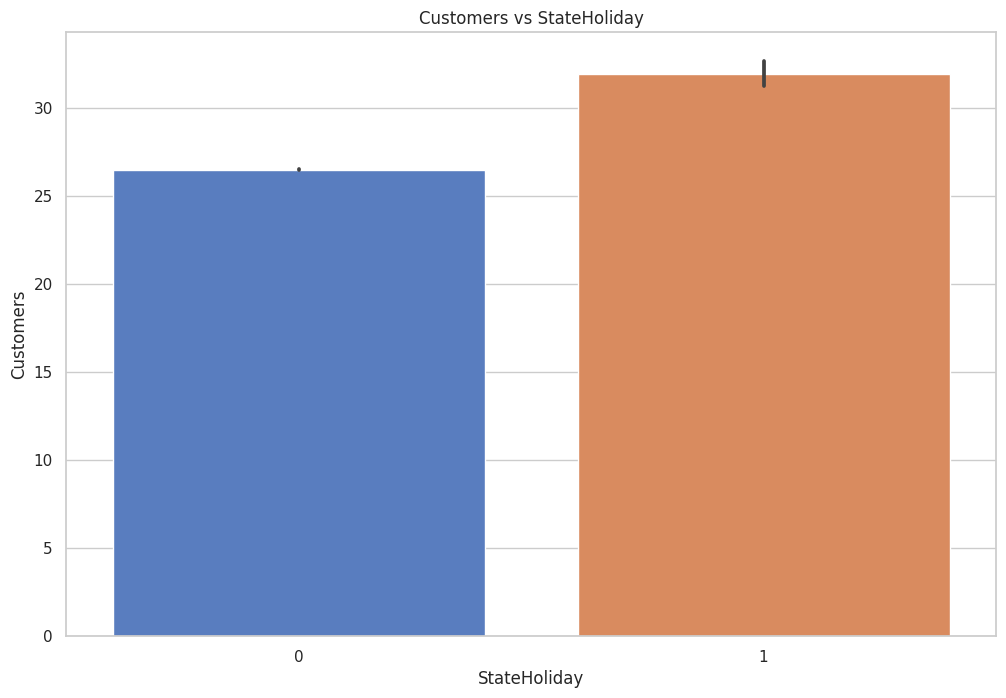

In [67]:
# Bargraph of Customers vs StateHoliday

sns.barplot(x = df_sales_Rossmann['StateHoliday'], y = df_sales_Rossmann['Customers'])
plt.title("Customers vs StateHoliday")
plt.show()

# Observations:

* From the first bargraph of Sales vs StateHoliday, it shows that sales does increase during state holidays.
* But the increment in sales during state holidays is not huge and it stays almost the same as in case of without state holidays
* The walkins of customers also increases during state holidays as it is evident from second bargraph of Customers vs StateHoliday.
* Customers are directly proportional to state holidays. That means State holidays do have a positive impact on customers but that impact is not huge.

# Sales vs SchoolHoliday

Now, the observation is on the effect of SchoolHoliday on Sales and Customers.

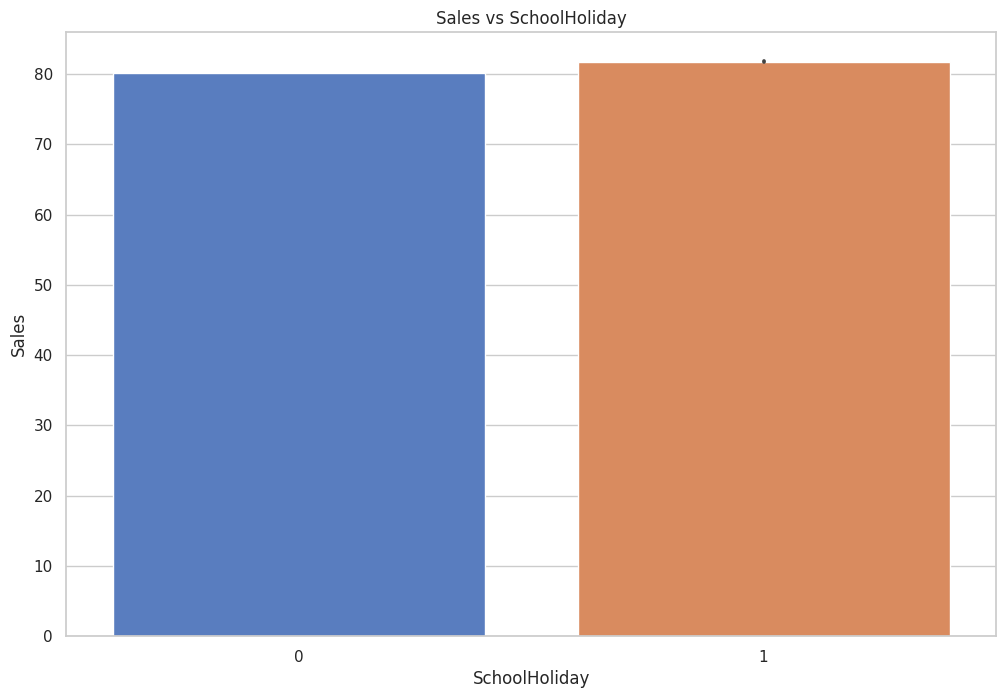

In [68]:
# Bargraph of Sales vs SchoolHoliday

sns.barplot(x = df_sales_Rossmann['SchoolHoliday'], y = df_sales_Rossmann['Sales'])
plt.title('Sales vs SchoolHoliday')
plt.show()

# Customers vs SchoolHoliday

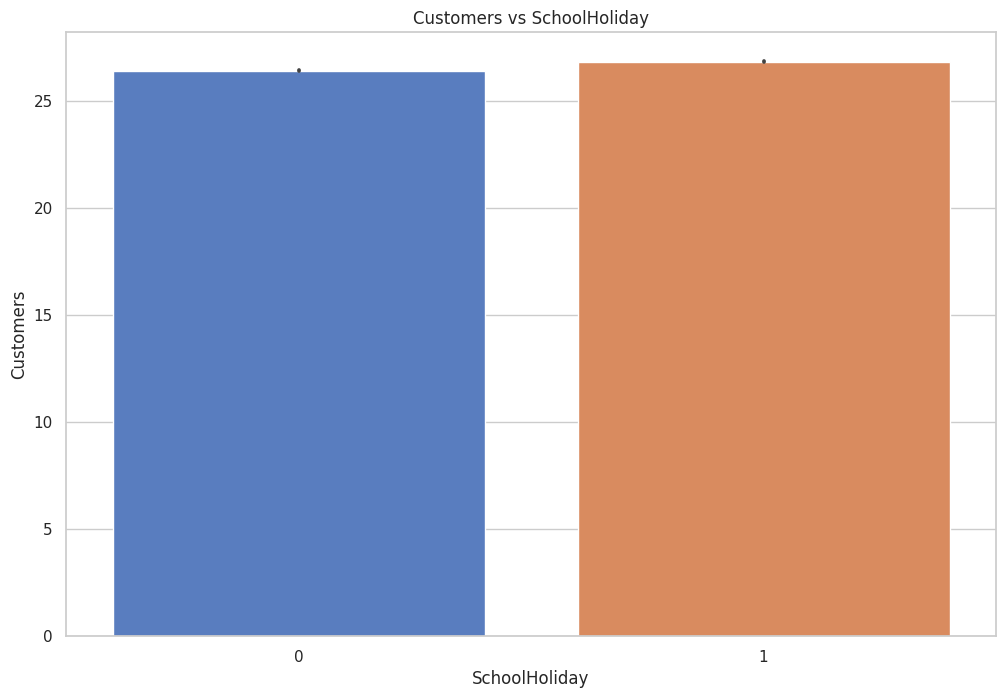

In [69]:
# Bargraph of Customers vs SchoolHoliday

sns.barplot(x = df_sales_Rossmann['SchoolHoliday'], y = df_sales_Rossmann['Customers'])
plt.title("Customers vs SchoolHoliday")
plt.show()

# Observations:

* From the first bargraph of Sales vs SchoolHoliday, it shows that the increment in sales is minor during school holidays.
* From the second bargraph of Customers vs SchoolHoliday, it shows that the increment in customers' walkins is minor during school holidays.
* Both sales and customers almost stay the same during school holidays and do not have that much impact on school holidays.

# The Effect Of Weekdays

The effect weekdays is also crucial. So, why not visualize the effect of weekdays in terms of grapical presentations. Let's do it then.

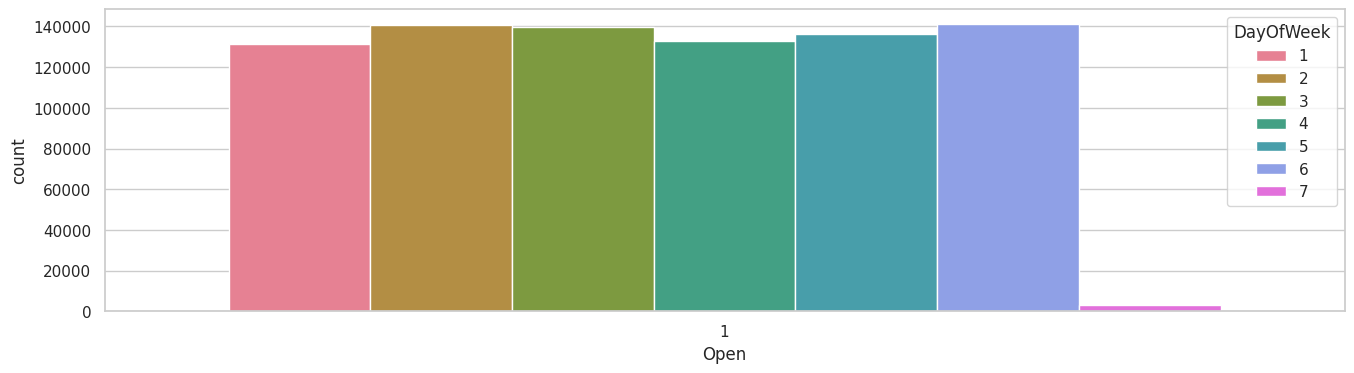

In [70]:
fig, (axis1) = plt.subplots(1,1, figsize = (16,4))
sns.countplot(x = 'Open', hue = 'DayOfWeek', data = df_sales_Rossmann, palette = 'husl', ax = axis1)

# Observations:

* This above countplot clearly shows that most of the shops are open during weekdays and closed on Sundays.
* Very few stores are closed on weekdays. Public holidays might be the reason for it as stores are usually closed on public holidays and open during school vacations.

# DayOfWeek vs Sales

Now, let's see how DayOfWeek impacts on Sales and Customers through some beautiful visualizations of bargraphs.

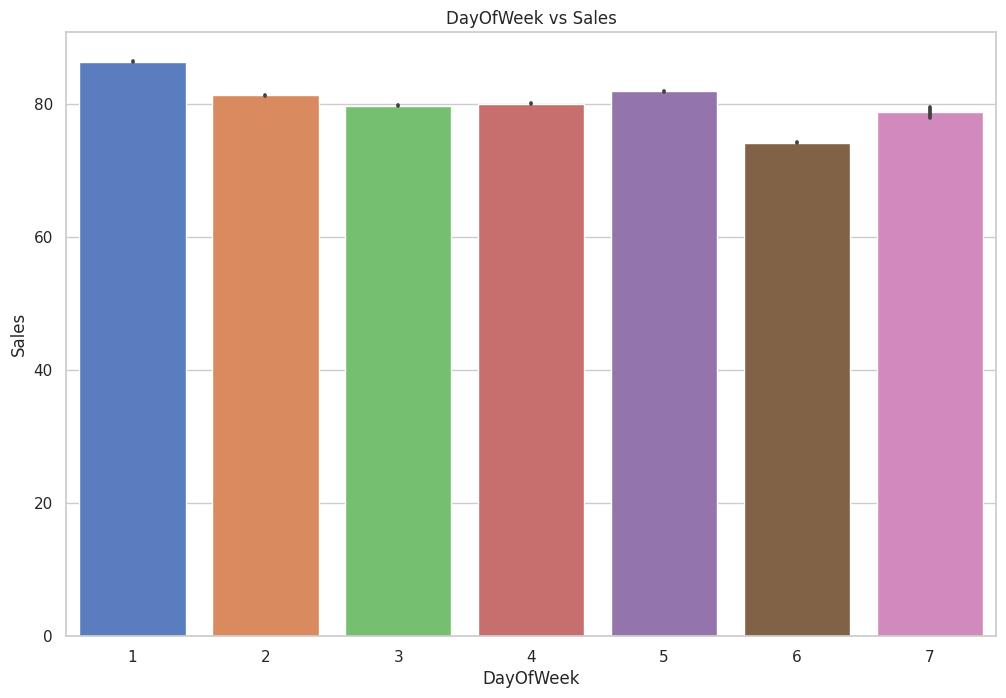

In [71]:
# Bargraph of DayOfWeek vs Sales

sns.barplot(x = df_sales_Rossmann['DayOfWeek'], y = df_sales_Rossmann['Sales'])
plt.title('DayOfWeek vs Sales')
plt.show()

# Observations:

* The above graph tells that most sales are done on weekdays. 
* On the other hand, most sales are also done on weekends though stores are closed on weekends ( Specially on Sundays ). Maximum number of sales are done on the very first day of a week.
* So, more or less sales almost stay the same on each and every day of a week.

# DayOfWeek vs Customers

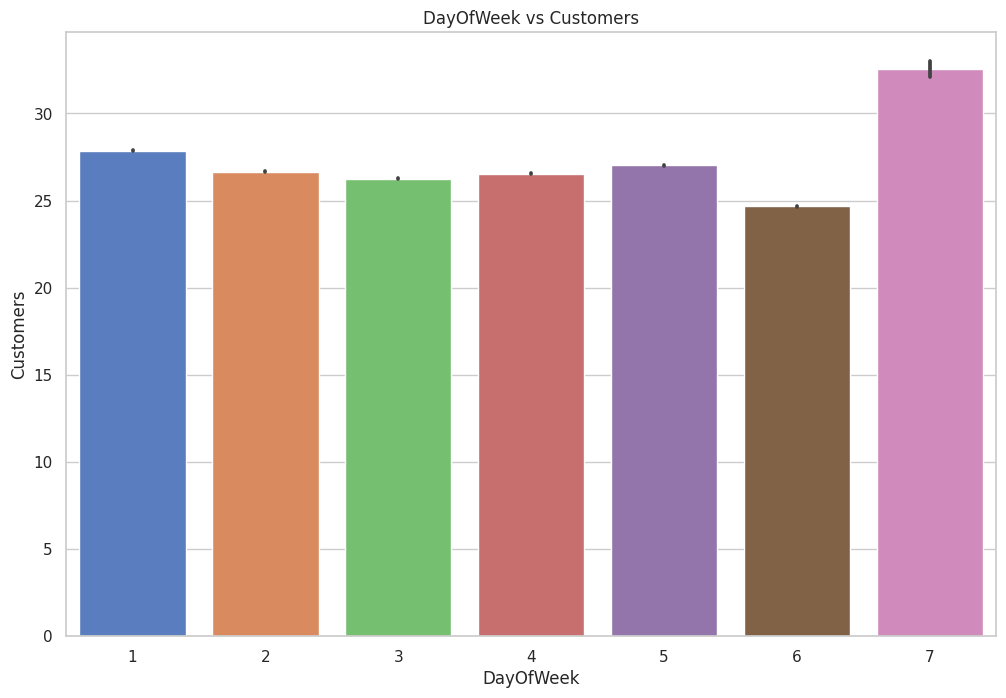

In [72]:
# Bargraph DayOfWeek vs Customers

sns.barplot(x = df_sales_Rossmann['DayOfWeek'], y = df_sales_Rossmann['Customers'])
plt.title("DayOfWeek vs Customers")
plt.show()

# Observations:

* This bargraph shows that most customers love to walk in to stores during weekends.
* Maximum walkin happen on Sundays.
* Weekdays are not lagging behind rather huge number of customers love to come along on weekdays.

# Average Sales Per Day Of The Week

Let's get into some more analysis. Let's have a look average sales per day of the week.

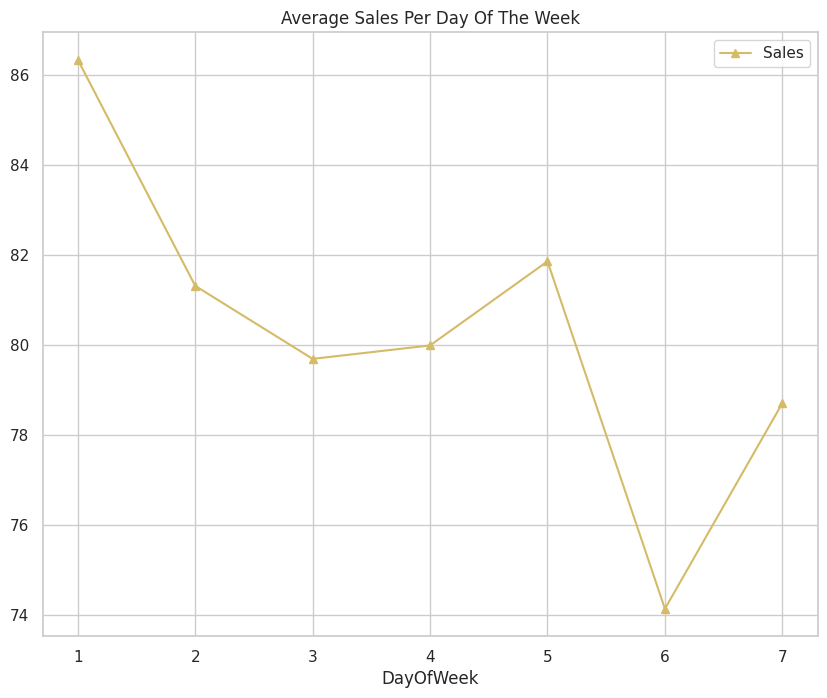

In [73]:
# Average sales per day of the week

axis = df_sales_Rossmann.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,8), marker = '^', color = 'y')
axis.set_title('Average Sales Per Day Of The Week')
plt.show()

# Observations:

* It is evident that average sales is the highest on the very first day of a week.
* The average sales stays almost the same on the rest of the weekdays.
* On Saturdays, it is coming to the lowest point and on Sundays it is getting higher.
* Sundays are far better than Saturdays during weekends but less than other normal weekdays as far as the average sales is concerned.

# Average Customers Per Day Of The Week

Now, let's have a look how average number of customers replicates in terms of per day of the week.

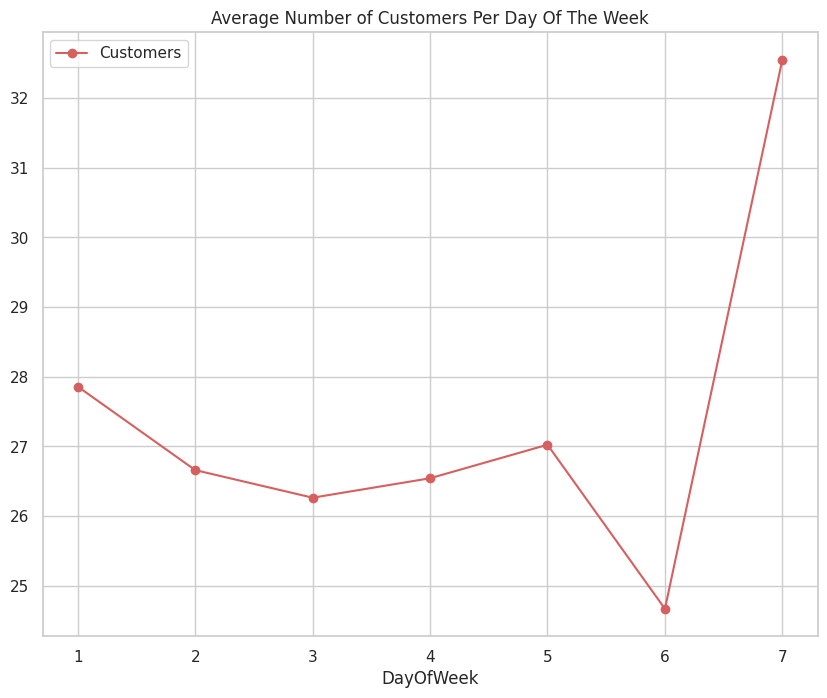

In [74]:
# Average number of customers per day of the week

axis = df_sales_Rossmann.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,8), marker = 'o', color = 'r')
axis.set_title('Average Number of Customers Per Day Of The Week')
plt.show()

# Observations:

* This graph shows that most numbers customers walk in on Sundays and the minimum number of customers are on Saturdays.
* So, weekends show the minimum and maximum number of customers on Saturdays and Sundays respectively.
* The walkins of customers almost stay the same on weekdaysexcept on Mondays where the walkins stay a bit higher in comparison with other weekdays.

# Sales Per Year

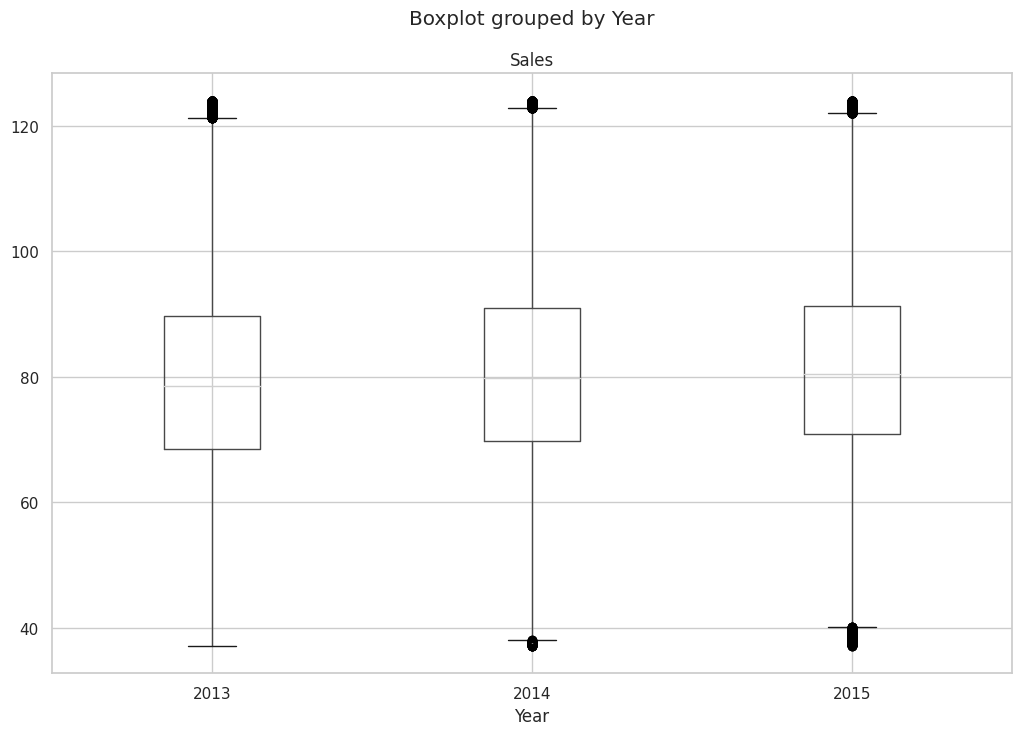

In [75]:
# Plotting boxplot graph to visualize sales per year

df_sales_Rossmann.boxplot(column= 'Sales', by = 'Year')
plt.show()

# Sales And Customers Per Month

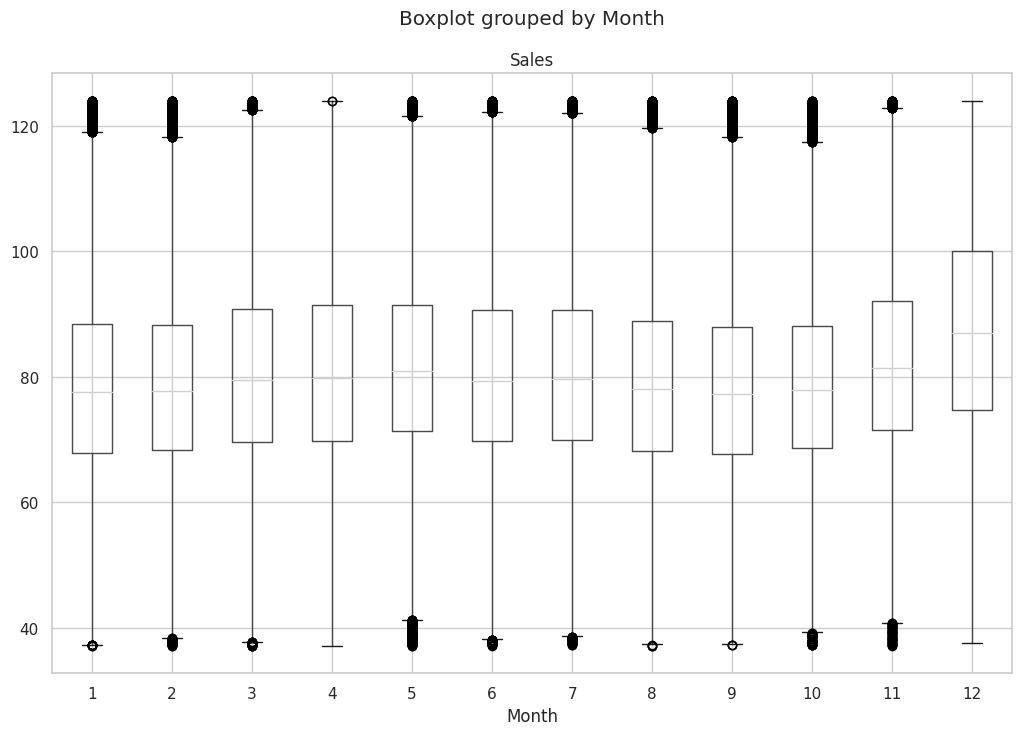

In [76]:
# Plotting of average sales per month through boxplot

df_sales_Rossmann.boxplot(column = 'Sales', by = 'Month')

# Average Sales Per Month

Here, sales per month means average sales per month. Let's visulaize average sales per month.

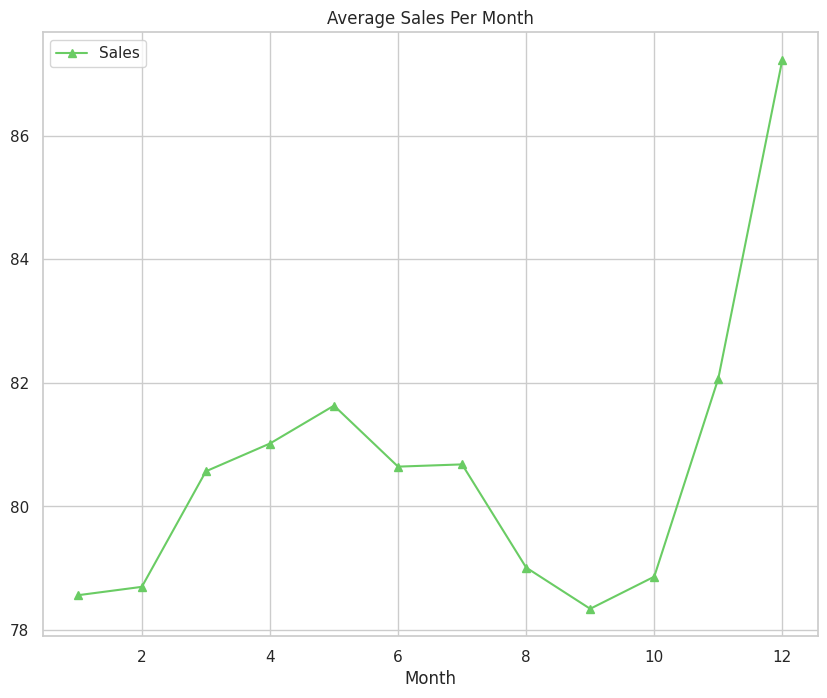

In [77]:
# Plotting average sales per month

axis = df_sales_Rossmann.groupby('Month')[['Sales']].mean().plot(figsize = (10,8), marker = '^', color = 'g')
axis.set_title('Average Sales Per Month')
plt.show()

# Average Customers Per Month

The average numbers of customers per month has been calculated on the basis of beautiful data visualization graph.

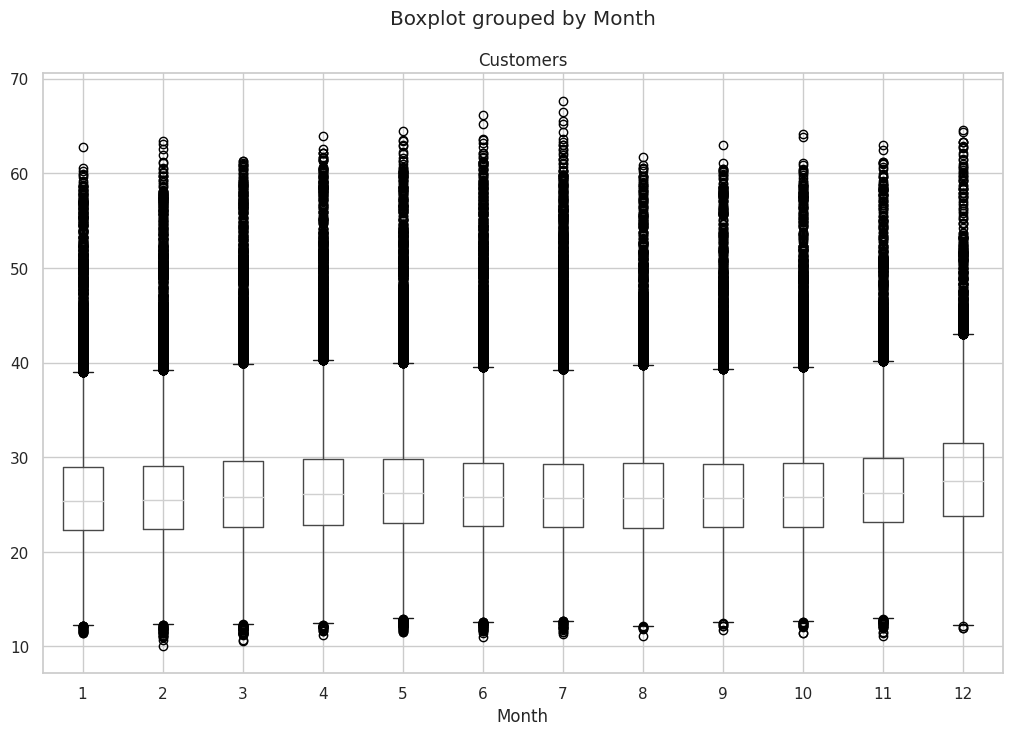

In [78]:
# Plotting of average customers per month through boxplot

df_sales_Rossmann.boxplot( column = 'Customers', by = 'Month')

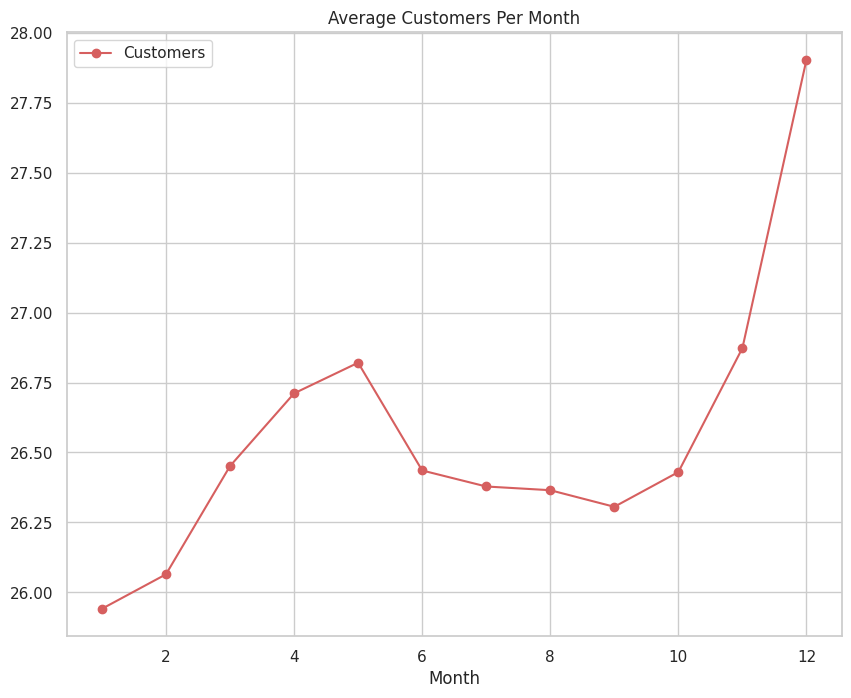

In [79]:
# Plotting average customers per month

axis = df_sales_Rossmann.groupby('Month')[['Customers']].mean().plot(figsize = (10,8), marker = 'o', color = 'r')
axis.set_title('Average Customers Per Month')
plt.show()

# Sales And Customers Per Day

# Average Sales Per Day

Average sales per day will be calculated in almost similar way by which average sales per month has been calculated in previous sections.

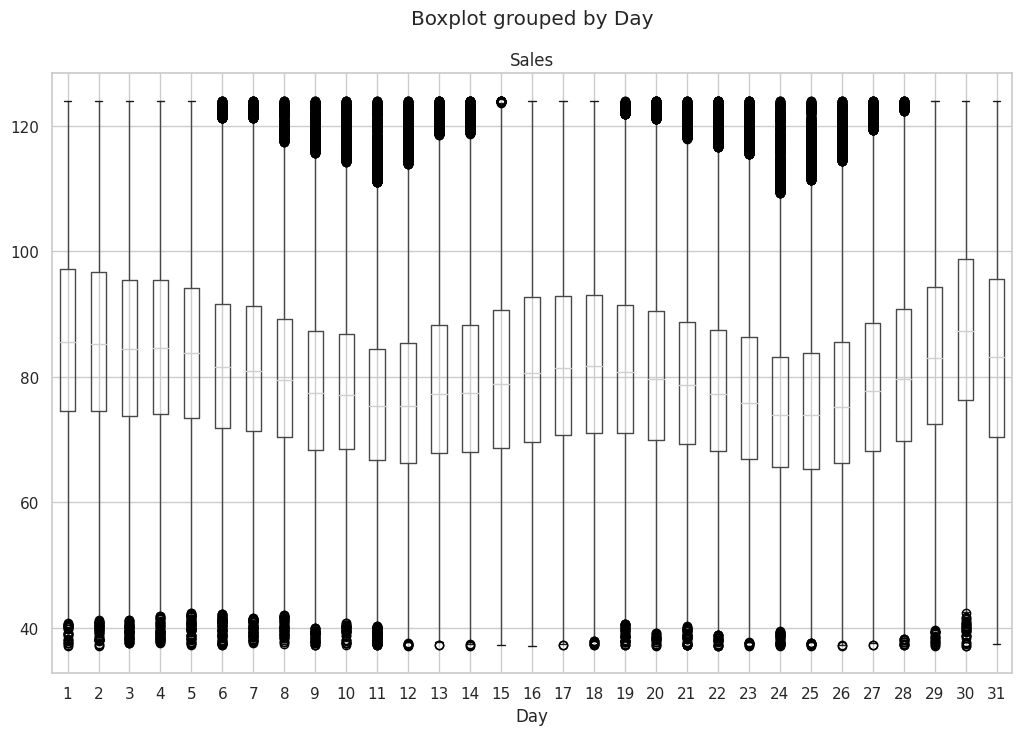

In [80]:
# Average sales per day through boxplot

df_sales_Rossmann.boxplot(column = 'Sales', by = 'Day')

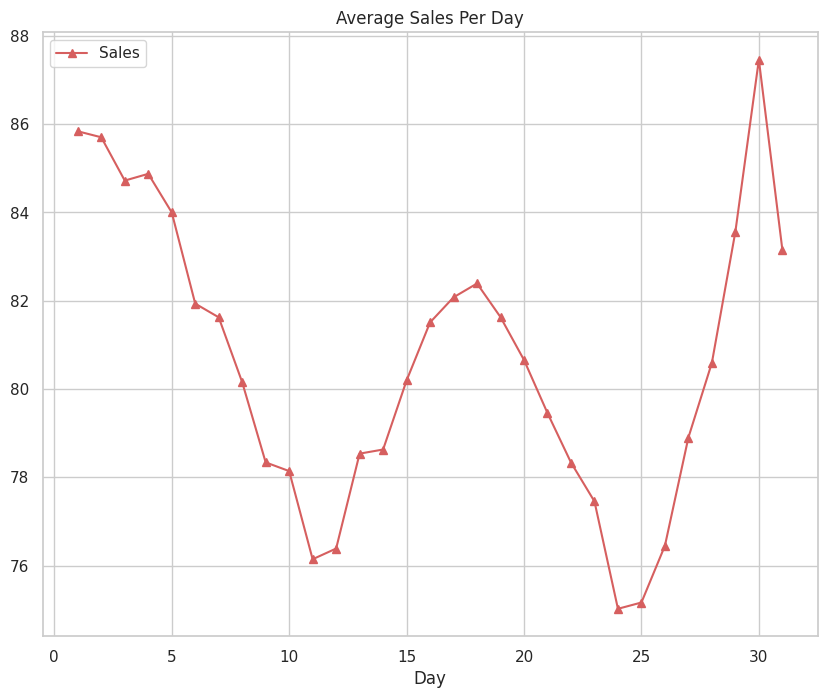

In [81]:
# Data visualization of average sales per day

axis = df_sales_Rossmann.groupby('Day')[['Sales']].mean().plot(figsize = (10,8), marker = '^', color = 'r')
axis.set_title('Average Sales Per Day')
plt.show()

# Average Customers Per Day

Average customers per day will be calculated in almost similar way by which average customers per month has been calculated in previous sections.

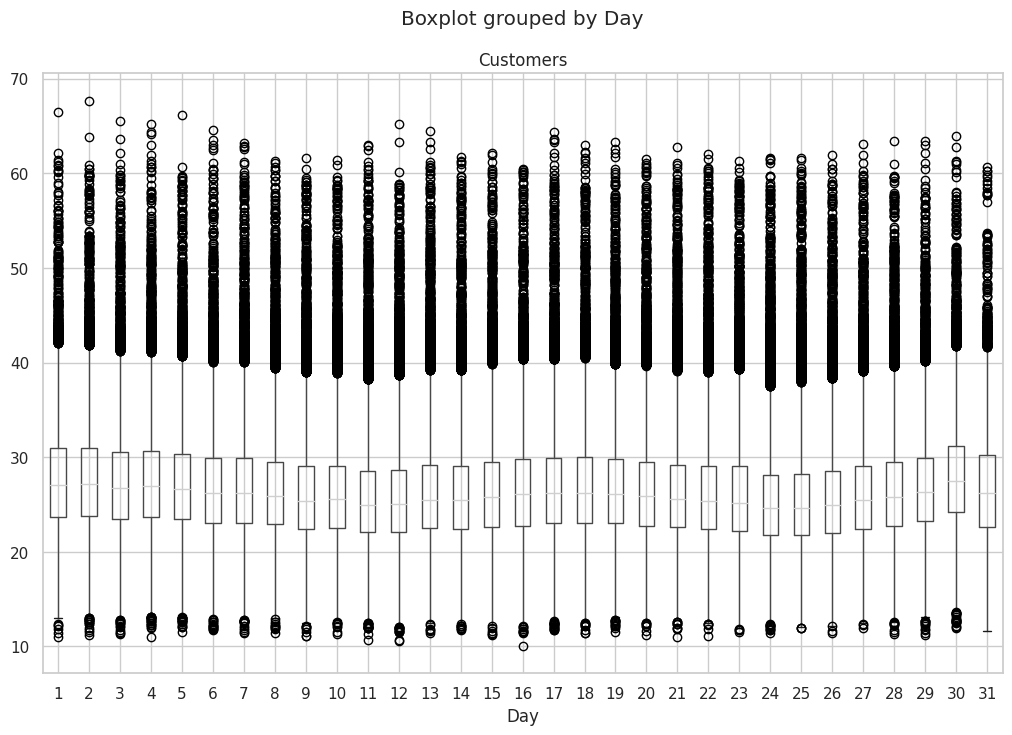

In [82]:

# Average customers per day through the visualization of boxplot

df_sales_Rossmann.boxplot(column = 'Customers', by = 'Day')

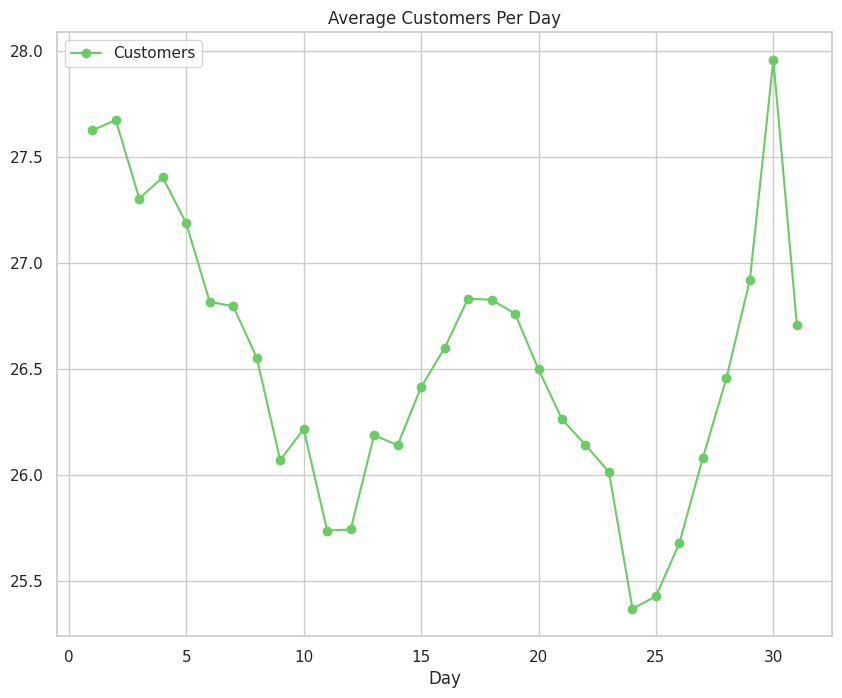

In [83]:
# Data visualization of average customers per day

axis = df_sales_Rossmann.groupby('Day')[['Customers']].mean().plot(figsize = (10,8), marker = 'o', color = 'g')
axis.set_title('Average Customers Per Day')
plt.show()

# Observations:

Some more observations have been summarized over here as some points of observations might be missed out in previous sections.

* Promotional offers play a major role to the increment of sales, revenue and customers for all stores in general.
* Sales is strongly correlated to the number of customers.
* Stores which are opened during school holidays have more sales than on normal days.
* More stores are opened during school holidays than on public holidays.
* Sales increase during Christmas time i,e,. at the end of a year. This might be people love to spend on beauty products on the eve of Christmas.

# Merging Datasets

There are two datasets available in this analysis. One is stores dataset and other is sales dataset of Rossmann. These two datasets will be merged to perform further analysis.

In [85]:
# Merging of sales and stores datasets of Rossmann using left join

df_merged_Rossmann = pd.merge(left = df_sales_Rossmann, right = df_stores_Rossmann, how = 'left', on = 'Store')

In [87]:
# Checking number of rows and columns in the merged dataset

df_merged_Rossmann.shape

(825571, 24)

In [88]:
# First five rows of merged dataset of Rossmann

df_merged_Rossmann.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Quarter,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,72.546537,23.558438,1,1,0,1,2015,...,3,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,77.871689,25.000000,1,1,0,1,2015,...,3,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,91.181138,28.653098,1,1,0,1,2015,...,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,118.300465,38.704005,1,1,0,1,2015,...,3,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,69.440622,23.643181,1,1,0,1,2015,...,3,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [89]:
# Printing last five rows of the merged dataset of Rossmann

df_merged_Rossmann.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Quarter,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
825566,682,2,2013-01-01,58.094750,23.790755,1,0,1,1,2013,...,1,b,a,150.0,9.0,2006.0,0,0.0,0.0,0
825567,733,2,2013-01-01,103.754518,48.754487,1,0,1,1,2013,...,1,b,b,860.0,10.0,1999.0,0,0.0,0.0,0
825568,769,2,2013-01-01,70.957734,35.327043,1,0,1,1,2013,...,1,b,b,840.0,9.0,2013.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
825569,948,2,2013-01-01,67.014924,32.233523,1,0,1,1,2013,...,1,b,b,1430.0,9.0,2013.0,0,0.0,0.0,0
825570,1097,2,2013-01-01,77.207513,37.483330,1,0,1,1,2013,...,1,b,b,720.0,3.0,2002.0,0,0.0,0.0,0


In [90]:
# Checking datatypes of merged dataset

df_merged_Rossmann.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                               float64
Customers                           float64
Open                                  int64
Promo                                 int64
StateHoliday                          int64
SchoolHoliday                         int64
Year                                  int64
Month                                 int64
Day                                   int64
Week                                  int64
WeekOfYear                            int64
Quarter                               int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                 

# Feature Selection of Regression Model

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0991bdf6a0>,
      dtype=object)

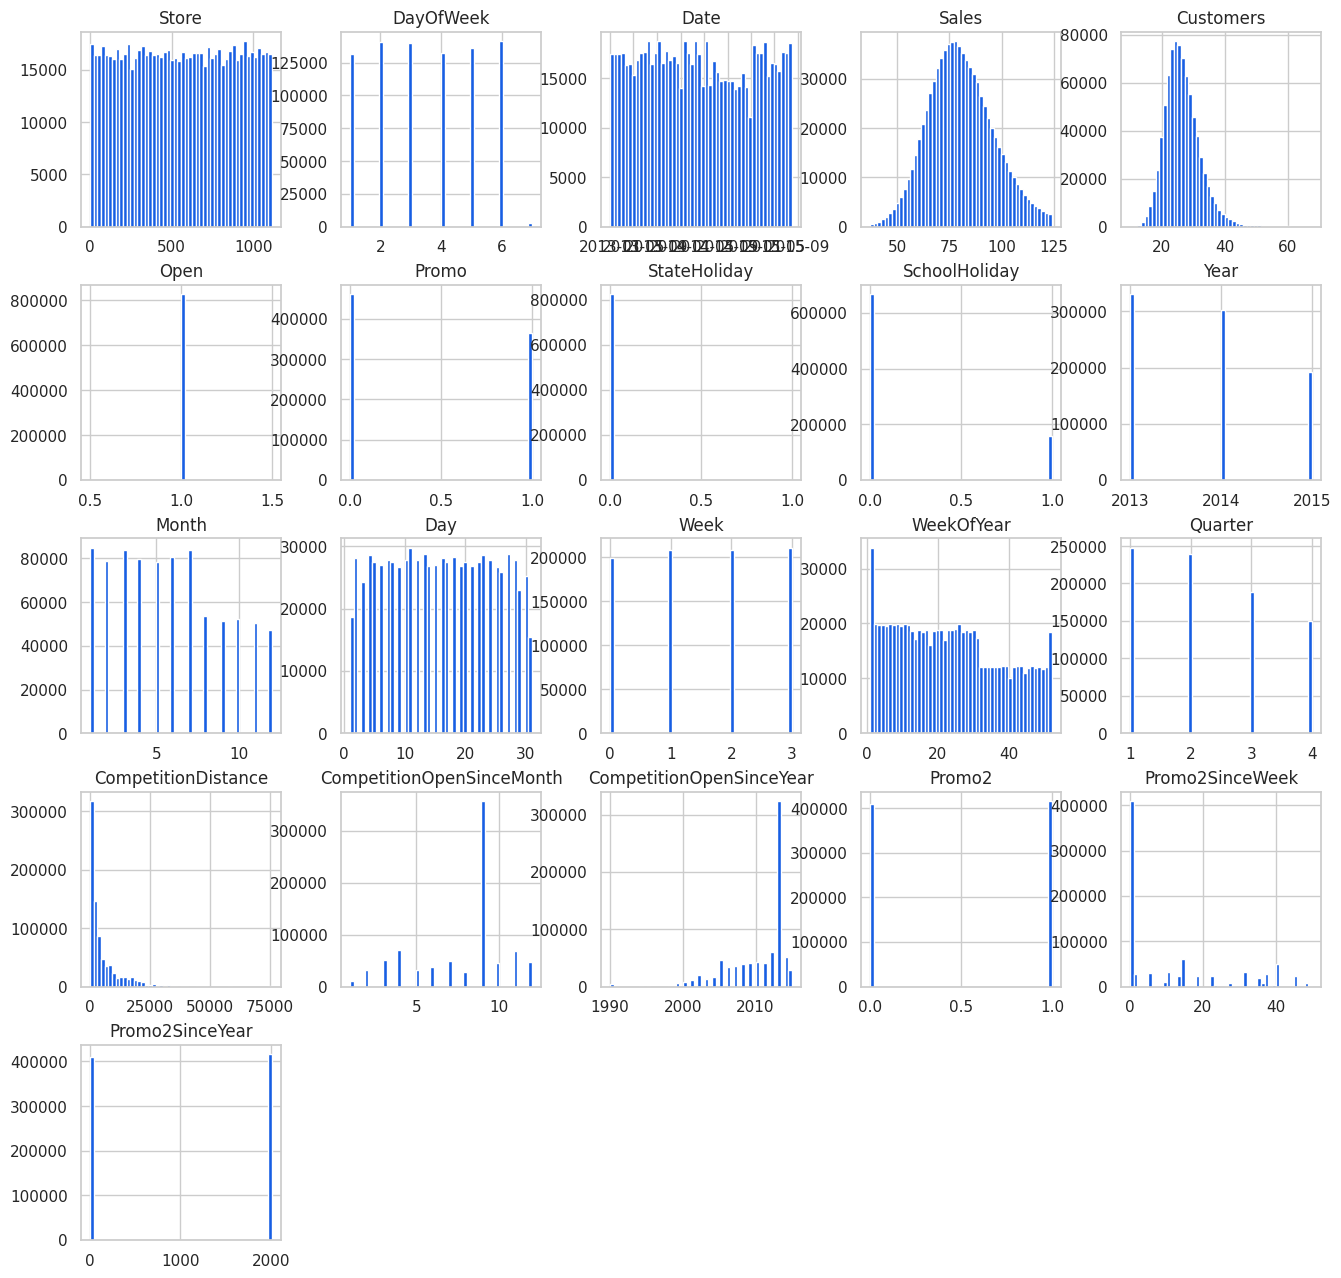

In [91]:
# Feature selection in case of regression

import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)
df_merged_Rossmann.hist(figsize = (16,16), bins = 50, color = '#175ee3')


# Assumptions in Regression

Regression is a parametric approach. ‘Parametric’ means it makes assumptions about data for the purpose of analysis. Due to its parametric side, regression is restrictive in nature.

* 1.There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). 
* 2.There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation. 
* 3.The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity. 
* 4.The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.
* 5.The error terms must be normally distributed.

# Linearity

Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a pair plot to check the relationship of independent variables with the Sales variable.

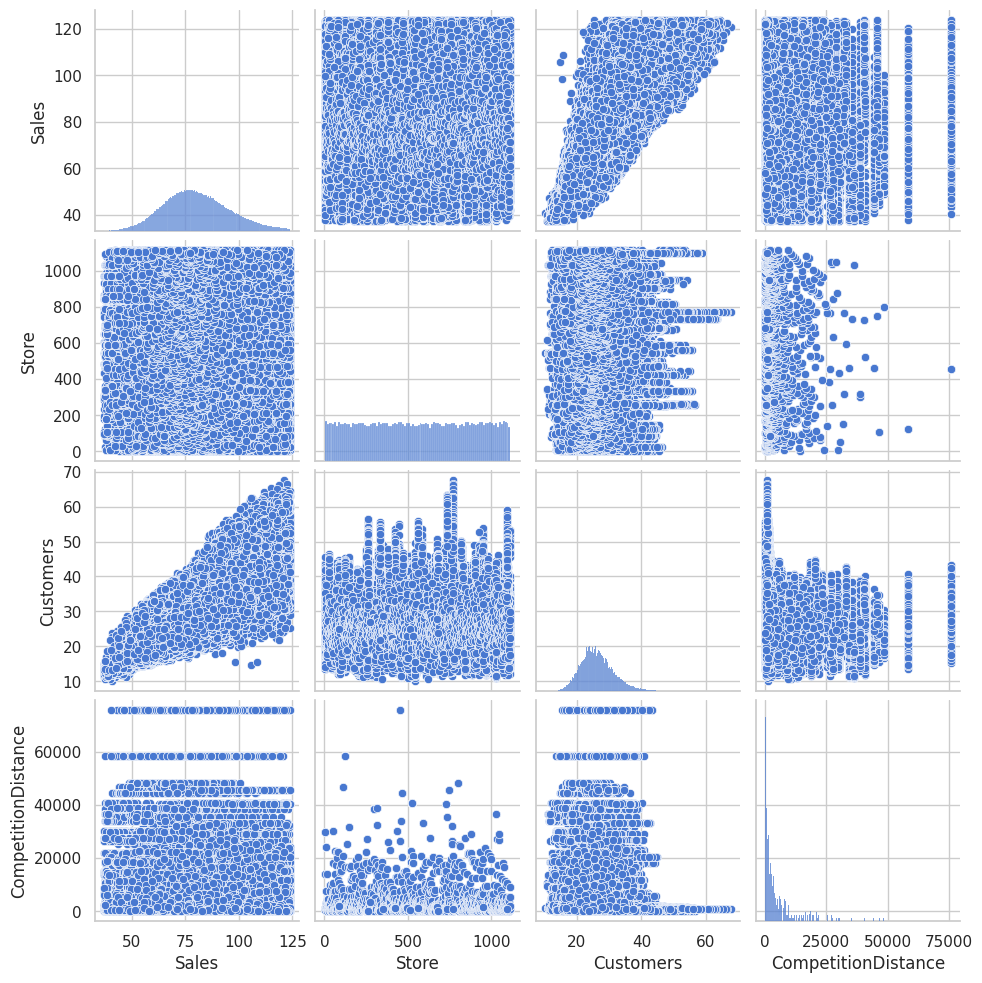

In [92]:
# Checking the relationship of independent variables with target variable (Sales)

plot = df_merged_Rossmann[['Sales','Store', 'Customers','CompetitionDistance']]
sns.pairplot(plot)
plt.show()

Let's check the relationship between some independent variables with the target variable 'Sales' through some beautiful visualizations of joint plot.

# Sales vs Store

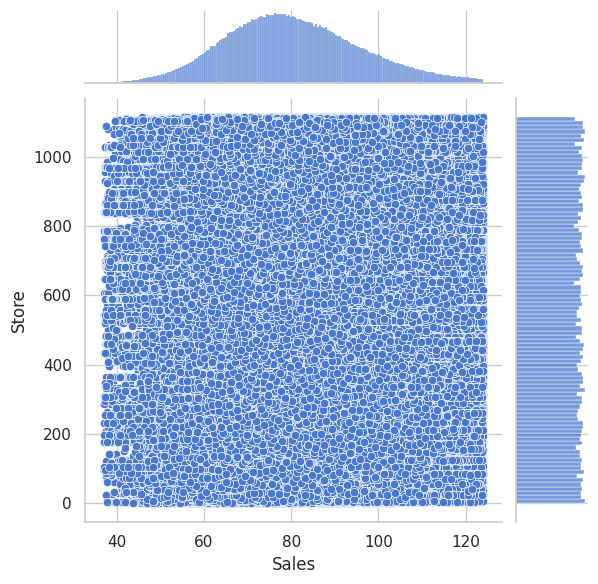

In [95]:
# Joint plot of Sales vs Stores

sns.jointplot(x = 'Sales', y = 'Store', data = df_merged_Rossmann)
plt.show()

# Sales vs Customers

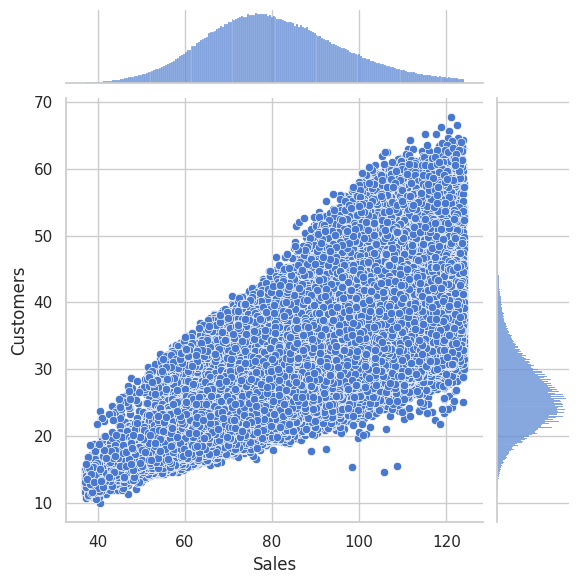

In [96]:
# Joint plot of Sales vs Customers

sns.jointplot(x = 'Sales', y = 'Customers', data = df_merged_Rossmann)
plt.show()

# Sales vs CompetitionDistance

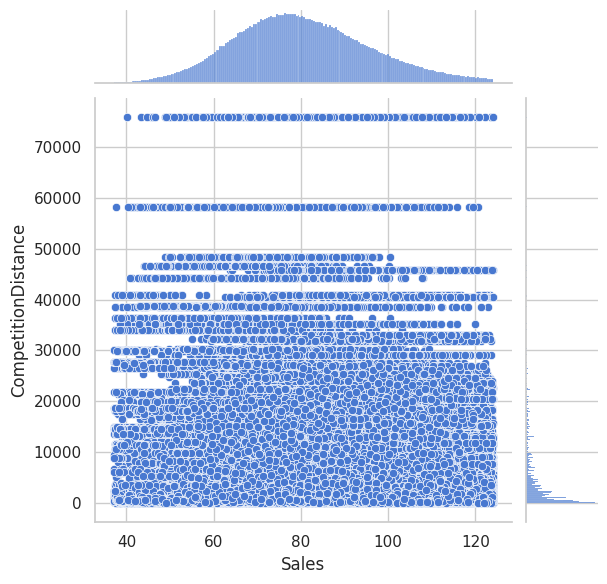

In [97]:
# Jointplot of Sales vs CompetitionDistance

sns.jointplot(x = 'Sales', y = 'CompetitionDistance', data = df_merged_Rossmann)
plt.show()

# Observations: 

* From those above joint plots, it can be observed that none of these independent variables ('Store', 'Customers', 'CompetitionDistance) construct an acuurate linear shape with the target variable 'Sales'.
* Therefore , it can be said that a linear regression model might not be the best model for it.
* A Linear model might not be able to explain that data with respect to prediction accuracy, variability.

# 3.1 Correlation Heatmap

Correlation Matrix : Correlation is a statistical term used to measure the degree in which two variables move in relation to each other. A perfect positive correlation means that the correlation coefficient is exactly 1. This implies that as one variable moves, either up or down, the other moves in the same direction. A perfect negative correlation means that two variables move in opposite directions, while a zero correlation implies no linear relationship at all.



Let's create a correlation heatmap to visualize correlation amongst all variables.

In [84]:
  Correlation = df_merge_Rossmann_copy.corr()

NameError: ignored

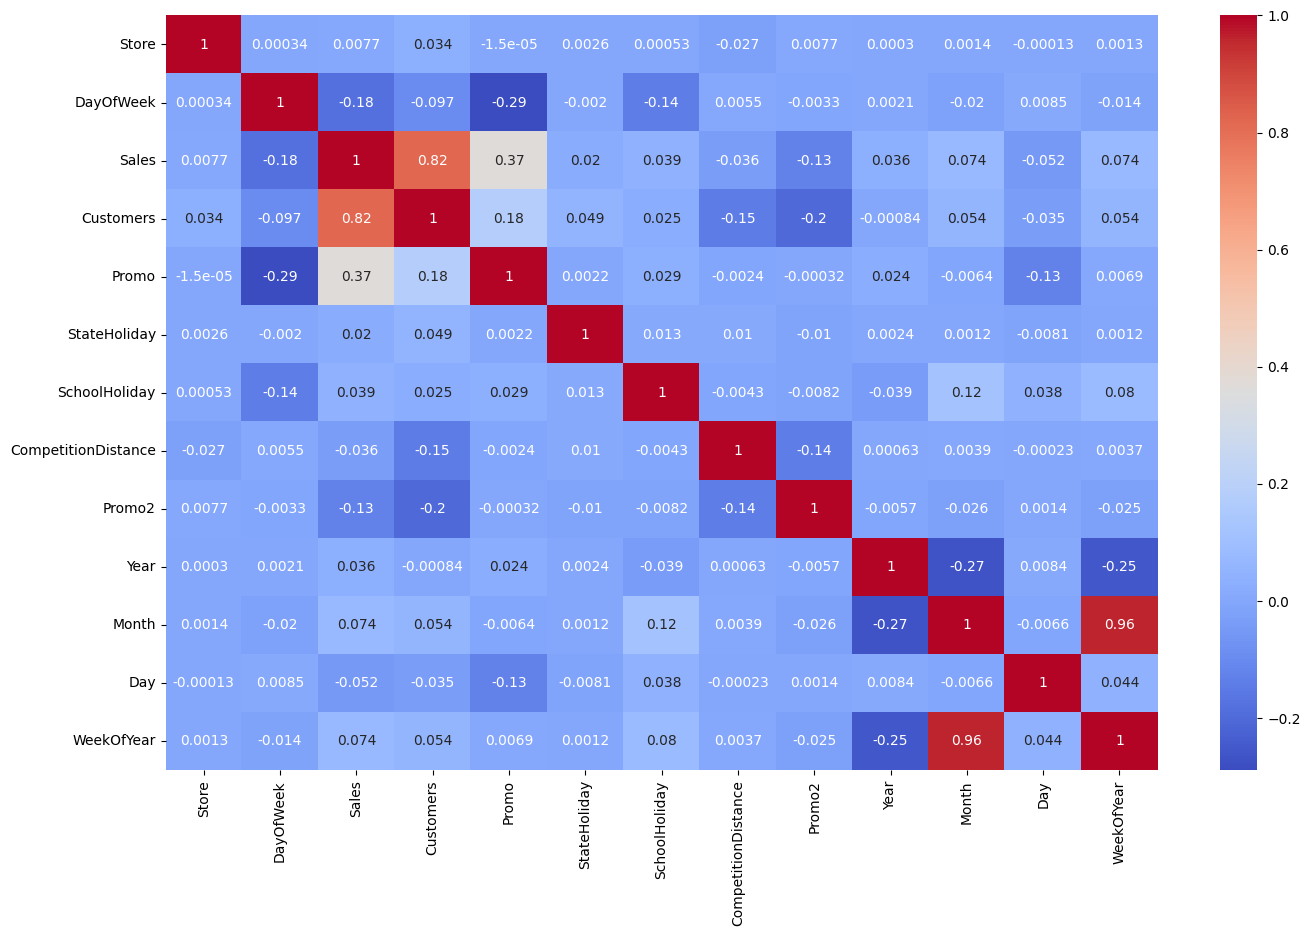

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(Correlation, cmap="coolwarm", annot=True)
     

# Observations:

* Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation.

* State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.

* CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier.

* There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.

* The correlation matrix is agreeing with all the observations done earlier while exploring through barplots and scatterplots.

# 3.2 Sales Distribution

# 3.3 Customer Distribution

# 3.4 Sales Over Time

# 4. Sales Prediction

# 4.1 Linear Regression (OLS)

# 4.2 Bayesian Ridge Regression

# 4.3 LARS Lasso Regression

# 4.4 Decision Tree Regression

# 4.5 Random Forest Regression

# 4.6 K-Nearest Neighbor Regression